# An Analysis of Diet and COVID-19 Outcomes


***
## Introduction

In our project we seek to understand the role of nutrition within the context of the ongoing Coronavirus Disease 2019 (COVID-19) Pandemic that started in December 2019 (Wikipedia, 2022). Since then, governments and their citizens have taken prevention measures to slow down the spread of COVID-19. What happens when we do contract the virus? How can we prepare our body’s defenses to deal with this novel virus? What we eat has the ability to influence our immune system (Cooper and Ma, 2017) and those who are immunocompromised or have a chronic medical condition may be more at risk of more severe disease or outcomes from COVID-19 (Government of Canada, 2022). If we can learn about the relationships between diet and COVID-19 outcomes, we may be able to come up with some suggestions and directions we can take our health to help us defend ourselves against COVID-19. Ultimately, our objective in this project is to look at obesity and undernourishment as indicators of poor diet and their relationship with COVID-19 outcomes: COVID-19 confirmed cases and deaths related to COVID-19.

***

## Guiding Questions

#### 1) How are obesity and undernourishment related to the number of COVID-19 positive cases and related deaths? 
   - Are the relationships between obesity, undernourishment, COVID-19 confirmed cases and COVID-19 related deaths different between the 5 different continents?

#### 2) What are the top 3 consumed food types for each continent?
   - Do the continents that share similar correlations between obesity, undernourishment, and COVID-19 Related outcomes have the same top 3 consumed food groups?
   - Are the top (3) consumed food groups similar or different between countries with high and low rates of obesity and between countries with high and low rates of undernourishment?
   - How do the main food groups vegetal and animal products compare between countries with high and low rates obesity. What about between countries with rate high or low rates of undernourishment?

#### 3) What percentage of Canada’s population is obese, and how is the average Canadian’s diet related to the number of COVID-19 positive cases and related deaths?
   - Is the average Canadian diet reflective of the Canadian diet guidelines?
   
***

# Data Sources

We will use data from the “COVID-19 Healthy Diet Dataset” (Kaggle, 2021) that contains 5 datasets, all structured in tabular .csv format and was last updated on 02/06/2021. 
We will also use a supplementary dataset called, "Country Mapping - ISO, Continent, Region" (Kaggle, 2020) structured in tabular .csv format. We will use this dataset to help us organize all the countries into the 5 different continents.
For the purpose of our project, we will specifically look at the following two datasets: “Food_Supply_Quantity_kg_Data” and “Supply_Food_Data_Descriptions”. 

Link to the “COVID-19 Healthy Diet Dataset” dataset (Kaggle, 2021): https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset?resource=download&select=Supply_Food_Data_Descriptions.csv
This dataset is licensed under the Creative Commons, under, Attribution-ShareAlike 3.0 Unported (CC BY-SA 3.0) which allows us adapt, transform, and build upon the material for any purpose.

Link to the "ISO-3166-Countries-With-Regional-Codes" dataset (GitHub, 2019): https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
This dataset is licensed under the Creative Commons Attribution-ShareAlike 4.0 International License, which allows us to share and adapt the material for any purpose.
*Note about this dataset: we actually pulled the dataset: "Country Mapping - ISO, Continent, Region" from Kaggle (2020), however the dataset did not indicate a license so we traced it back to the dataset this one was modified from to get the license information.*
*In our project, we use the modified dataset from Kaggle (2020) which was modified from the dataset pulled from GitHub (2019). Both datasets were referenced below*

In [111]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display


# Data Wrangling

***
STEPS TAKEN:
- Import both datasets that will be used in this project.

- Remove missing obesity and undernourished values from the dataset in Food_Supply_Quantity_kg_Data.csv (Kaggle, 2021).

- Remove any unnecessary columns that will not be used in the analyses.

- Update undernourished values from "<2.5" to be "2.5" for easier data analyses.

- Add the "Region" column to classify which countries belong to which continent.

- Assign each country from the dataset: Food_Supply_Quantity_kg_Data.csv (Kaggle, 2021) to a region (continent) using the "continents2.csv" data file (Kaggle, 2020) by merging the two dataframes.

- Finally, remove any missing values from this data set that we may have not removed already.

In [50]:
# import the "Food_Supply_Quantity_kg_Data.csv" data set (Kaggle, 2021)
data = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

# import the supplementary dataset, "continents2.csv" (Github, 2019) to help use classify which countries belong to which continent
continent = pd.read_csv('continents2.csv')

## Food_Supply_Quantity_kg_Data.csv (Kaggle, 2021)
***

In [51]:
# preview the dataset
data.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


Remove missing obesity and undernourished values from the dataset in Food_Supply_Quantity_kg_Data.csv (Kaggle, 2021).

Remove any unnecessary columns that will not be used in the analyses.

Update undernourished values from "<2.5" to be "2.5" for easier data analyses.

In [52]:
# creating a dataframe containing only the values for Canada for analysis in question #3
canada = data.loc[data['Country'] == 'Canada']

# removing any missing values
df = data.dropna()

# remove the 'Unit (all except Population)' column as it will not be used in our analysis
df = df.drop('Unit (all except Population)', axis=1)
df.iloc[:,1:24] = df.iloc[:,1:24] *2

# creating another dataframe containing only the variables that we will be using in our analyses
dff = df[['Country', 'Animal Products', 'Vegetal Products', 'Obesity']]

# drop the columns: "Animal Products" and "Vegetal Products"
df = df.drop(labels=['Animal Products', 'Vegetal Products'], axis=1)

# update undernourished values from "<2.5" to be "2.5" for easier data analysis and calculations
df.loc[df['Undernourished'] == '<2.5','Undernourished'] = 2.5

# converting the unernourishment number to the numeric type: float64
df['Undernourished'] = pd.to_numeric(df['Undernourished'])
#df['Undernourished'] = df.apply(lambda row: 2.5 if row['Undernourished'] == '<2.5' else float(row['Undernourished']), axis = 1)

# display the current data
df.head(10)

,Country,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0028,0.3946,0.0000,49.6194,0.4198,0.0700,10.6990,2.4040,15.1656,...,0.1540,1.0690,13.5284,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,3.3438,0.2714,0.0000,11.5634,1.1630,0.4252,13.5722,3.7690,31.4426,...,0.3030,0.6522,23.5506,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.5422,0.0564,0.0000,27.3632,1.0554,0.4832,12.7602,2.2610,15.2378,...,0.2304,2.0620,23.2968,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,11.6174,0.1120,0.0000,18.2170,0.1174,3.5414,12.0010,4.1142,1.6622,...,0.0122,1.2926,4.6082,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0
5,Argentina,8.5344,0.4468,0.0000,16.8204,1.9958,0.9386,12.0870,14.0842,20.4656,...,0.0400,1.9082,8.7006,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0
6,Armenia,0.8028,0.3666,0.0000,14.5964,1.1566,0.5792,12.1978,4.5350,19.8814,...,0.2216,0.9410,33.4038,20.9,4.3,5.681225,0.105345,5.398410,0.177470,2956000.0
7,Australia,11.0872,0.6286,0.0066,10.9958,0.8856,2.8528,8.3766,13.4098,24.2036,...,0.6352,2.5596,10.2812,30.4,2.5,0.112025,0.003530,0.101289,0.007207,25754000.0
8,Austria,14.0430,1.7110,0.0022,12.4232,1.5768,1.5124,9.2138,9.3620,24.7552,...,0.4734,1.6218,10.2196,21.9,2.5,4.739982,0.089679,4.496870,0.153433,8914000.0
9,Azerbaijan,7.1938,0.5088,0.0000,26.1796,1.1186,0.4040,9.5976,4.3026,16.6424,...,0.3812,0.4470,20.1510,19.9,2.5,2.285536,0.031223,2.225574,0.028740,10108000.0
11,Bangladesh,0.0062,0.0312,0.0000,59.6090,0.5914,5.0442,5.7310,0.8382,3.7556,...,0.1868,1.5230,7.2810,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0


In [53]:
#confirm that all the values have been converted properly by checking their type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   154 non-null    object 
 1   Alcoholic Beverages       154 non-null    float64
 2   Animal fats               154 non-null    float64
 3   Aquatic Products, Other   154 non-null    float64
 4   Cereals - Excluding Beer  154 non-null    float64
 5   Eggs                      154 non-null    float64
 6   Fish, Seafood             154 non-null    float64
 7   Fruits - Excluding Wine   154 non-null    float64
 8   Meat                      154 non-null    float64
 9   Milk - Excluding Butter   154 non-null    float64
 10  Miscellaneous             154 non-null    float64
 11  Offals                    154 non-null    float64
 12  Oilcrops                  154 non-null    float64
 13  Pulses                    154 non-null    float64
 14  Spices    

## continents2.csv (Kaggle, 2020)
***

In [54]:
# previewing the "continents2.csv" (Kaggle, 2020) dataset to see what we need to 'wrangle'
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


For the "continents2.csv" dataset file, rename the country names to match the country names in the "Food_Supply_Quantity_kg_Data.csv" file.

In [55]:
continent.loc[continent['name'] == 'Iran','name'] = 'Iran (Islamic Republic of)'
continent.loc[continent['name'] == 'South Korea','name'] = 'Korea, South'
continent.loc[continent['name'] == 'Korea, Republic of','name'] = 'Korea, North'
continent.loc[continent['name'] == 'Russia','name'] = 'Russian Federation'
continent.loc[continent['name'] == 'Taiwan','name'] = 'Taiwan*'
continent.loc[continent['name'] == 'United States','name'] = 'United States of America'
continent.loc[continent['name'] == 'Venezuela','name'] = 'Venezuela (Bolivarian Republic of)'
continent.loc[continent['name'] == "Côte D'Ivoire",'name'] = "Cote d'Ivoire"
continent.loc[continent['name'] == 'Czech Republic','name'] = 'Czechia'
continent.loc[continent['name'] == 'Guinea Bissau','name'] = 'Guinea-Bissau'
continent.loc[continent['name'] == 'Laos','name'] = "Lao People's Democratic Republic"
continent.loc[continent['name'] == 'Macedonia','name'] = 'North Macedonia'
continent.loc[continent['name'] == 'Tanzania','name'] = 'United Republic of Tanzania'

Add the "Region" column to help us classify which countries belong to which continent in the "Food_Supply_Quantity_kg_Data.csv" data set (Kaggle, 2021)

In [56]:
# create a dataframe containing only the name and region columns from the contients2.csv file
continent = continent[['name', 'region']]

continent.head()

# create a variable to contain names of new columns to create: 'country' and 'region'
new_col = ['Country', 'region']

# replace the column names with 'country' and 'region'
continent.columns = new_col

In [57]:
# display the newly created dataframe with dropped values
continent.head()

# display all the unique values of the column 'region'
# continent['region'].unique()

,Country,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


Join the continent information from the dataset: "continents2.csv" (Kaggle, 2020) with the information in the dataset: Food_Supply_Quantity_kg_Data.csv (Kaggle, 2021)

In [58]:
# change all names in the variable 'country' to lowercase in both data frames ('continents.csv' (Kaggle, 20220) and 'Food_Supply_Quantity_kg_Data.csv' (Kaggle, 2021)).
continent['Country'] = continent.Country.str.lower()
df['Country'] = df.Country.str.lower()

In [59]:
# using the merge function, join the two dataframes by the variable "country" 
# we are using a "left" merge, which will only use keys from the left frame, which in this case is the "df" frame and will preserve key order.
# make this our new dataframe associated with 'df'
df = df.merge(continent, on='Country', how='left')#.sort_values(by='region')

Finally, remove any missing values from this data set that we may have not removed already.

In [62]:
# remove any missing values
#df = df.dropna()

In [63]:
# df.info

## Data Wrangling for the Sunburst Chart
***

Create the 'sun' dataframe that will be used for our sunburst plot, to display food distribution.

In [64]:
# create a new dataframe to display food variables data in a sunburst plot for question #2
# remove all non-food type variables
sun = df.drop(labels=['Obesity', 'Undernourished','Confirmed','Deaths','Recovered','Active','Population'], axis=1)

# group the food type variables by 'region'/continent
# evaluate the mean percentage of the food type intake for all countries associated with that region
sun = sun.groupby(['region']).mean()

# display the newly created dataframe
sun.head()

,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,...,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables
region,,,,,,,,,,,,,,,,,,,,,
Africa,5.732902,0.125316,0.001049,30.123404,0.351733,2.160049,10.238364,3.948182,6.680636,0.613476,...,1.734138,1.869560,0.175409,20.247880,0.200747,3.838844,0.219276,0.170404,1.883840,9.248160
Americas,6.075414,0.260650,0.005079,21.399457,1.208307,2.018586,16.651221,8.470264,12.910664,1.042607,...,1.083621,1.406529,0.131714,7.780607,0.466914,7.257571,0.097129,0.133614,1.822843,9.417986
Asia,2.531822,0.279249,0.103795,30.974557,1.130605,3.453627,10.500859,6.053249,11.221681,0.782086,...,1.189654,0.868011,0.299768,5.482443,0.495584,5.167049,0.487654,0.360600,1.700416,16.497697
Europe,9.951516,1.136284,0.002679,13.466868,1.237121,2.329663,8.650379,7.775184,24.946679,0.634979,...,0.389358,0.290879,0.133532,7.005963,0.587389,6.150932,0.000037,0.287074,1.426779,13.290089
Oceania,5.040400,0.586800,0.052700,14.168133,0.606400,4.238133,10.082233,8.661000,8.326167,0.803233,...,10.935767,0.602667,0.092433,19.564033,0.301500,6.784500,0.004833,0.177800,1.298767,7.320133


In [65]:
# stack the food variable columns to an index/row
# rename the food type variables mean percentage to 'value'
sun = sun.stack().rename('value')

# reset the index of the dataframe and use the default one instead
sun = sun.reset_index()

# display the 'sun' dataframe for checking purposes
sun

,region,level_1,value
0,Africa,Alcoholic Beverages,5.732902
1,Africa,Animal fats,0.125316
2,Africa,"Aquatic Products, Other",0.001049
3,Africa,Cereals - Excluding Beer,30.123404
4,Africa,Eggs,0.351733
...,...,...,...
100,Oceania,Sugar & Sweeteners,6.784500
101,Oceania,Sugar Crops,0.004833
102,Oceania,Treenuts,0.177800
103,Oceania,Vegetable Oils,1.298767


In [66]:
# display the dataframe again for convenience and checking
df.head()

,Country,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,region
0,afghanistan,0.0028,0.3946,0.0,49.6194,0.4198,0.0700,10.6990,2.4040,15.1656,...,1.0690,13.5284,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,Asia
1,albania,3.3438,0.2714,0.0,11.5634,1.1630,0.4252,13.5722,3.7690,31.4426,...,0.6522,23.5506,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,Europe
2,algeria,0.5422,0.0564,0.0,27.3632,1.0554,0.4832,12.7602,2.2610,15.2378,...,2.0620,23.2968,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,Africa
3,angola,11.6174,0.1120,0.0,18.2170,0.1174,3.5414,12.0010,4.1142,1.6622,...,1.2926,4.6082,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0,Africa
4,argentina,8.5344,0.4468,0.0,16.8204,1.9958,0.9386,12.0870,14.0842,20.4656,...,1.9082,8.7006,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,Americas


# Variable Descriptions and Details
***

## COVID-19 Outcomes (Description)

In this project, when 'COVID-19 Outcomes' is mentioned, this includes the two variables: COVID-19 confirmed positive cases and deaths related to COVID-19. 


## FOOD GROUPS (Variables)
Below is a table detailing which food groups up make up the main food groups: 'Animal Products' and 'Vegetal Products'. <br>
*This table was created in excel and saved as an image.*

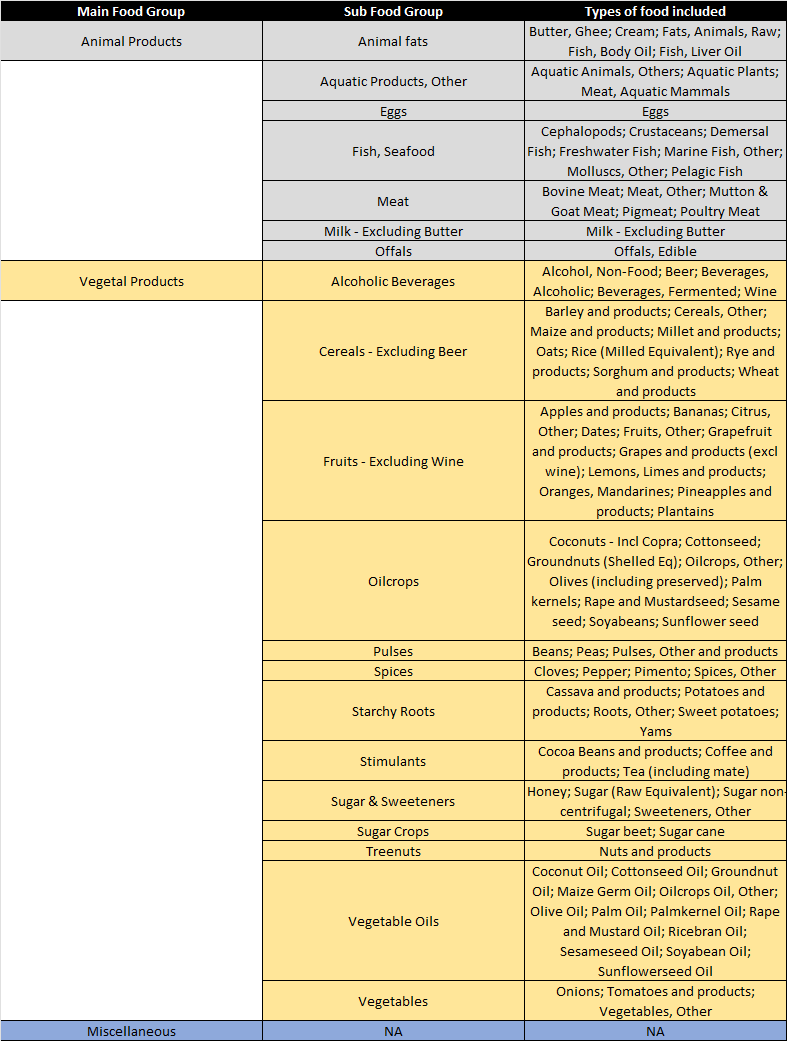

## CONTINENTS (Variables)

The continents we will be looking at are:
- Africa
- Americas (North and South America combined)
- Asia
- Europe
- Oceania

Our data set has 170 countries that will be included in these groups. <br>

*In our project, the column that denotes continents is named "region" instead.*

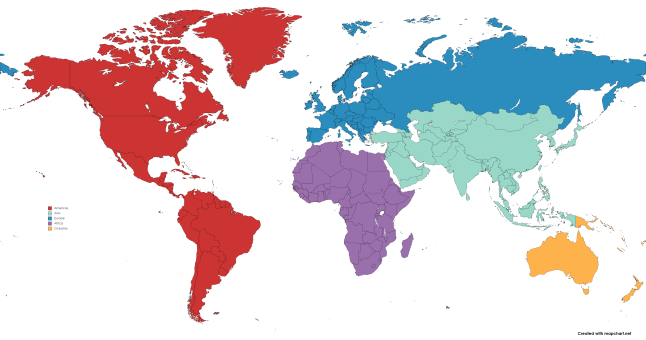


# General Data Visualizations
***

## Obesity rates across the world

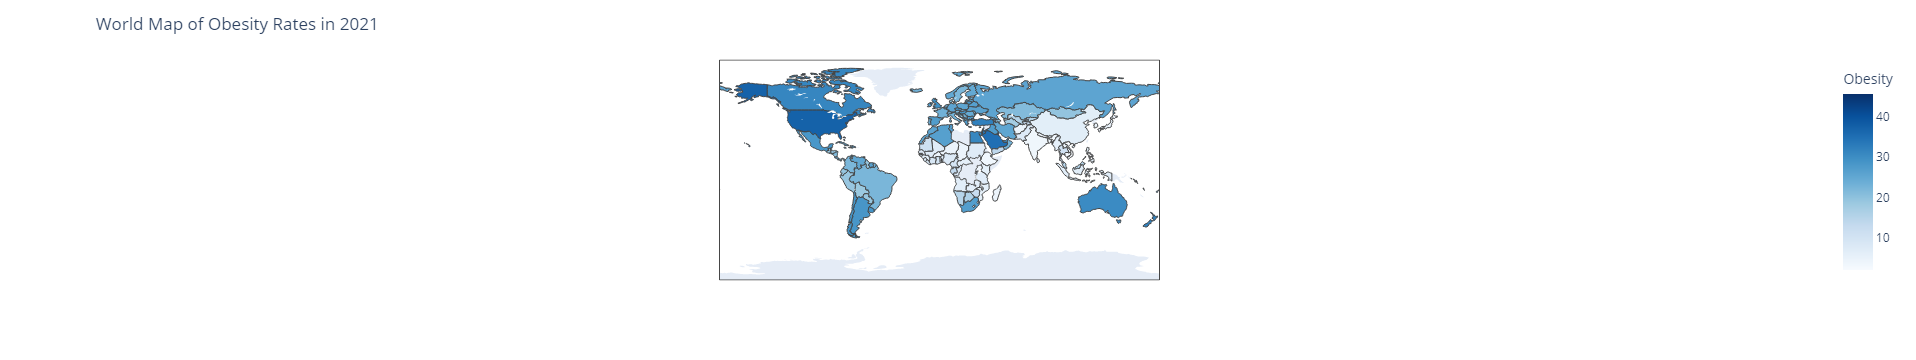

In [67]:
# creating a choropleth map that helps us visualize a side by side comparison with countries that have higher obesity rates

fig = px.choropleth(data, locations="Country", color="Obesity",  locationmode='country names', color_continuous_scale='blues')

# add a title to our map
fig.update_layout(
    title_text='World Map of Obesity Rates in 2021',
    geo=dict(
        showframe=True,
        # removing the coastlines because they are not pertinent to our visualization
        showcoastlines=False,
    )
)

# display the map
fig.show()

In [105]:
# obtain the mean of obesity and undernourishment (for all continents)
#df['Obesity'].mean()
#display(df.loc[df['region'] == 'Asia']['Obesity'].mean())

obAmericas = df.loc[df['region'] == 'Americas']['Obesity'].mean()
obEurope = df.loc[df['region'] == 'Europe']['Obesity'].mean()
obOceania = df.loc[df['region'] == 'Oceania']['Obesity'].mean()
obAfrica = df.loc[df['region'] == 'Africa']['Obesity'].mean()
obAsia = df.loc[df['region'] == 'Asia']['Obesity'].mean()

unAmericas = df.loc[df['region'] == 'Americas']['Undernourished'].mean()
unEurope = df.loc[df['region'] == 'Europe']['Undernourished'].mean()
unOceania = df.loc[df['region'] == 'Oceania']['Undernourished'].mean()
unAfrica = df.loc[df['region'] == 'Africa']['Undernourished'].mean()
unAsia = df.loc[df['region'] == 'Asia']['Undernourished'].mean()

## Average food type intake visualized per continent as a sunburst chart

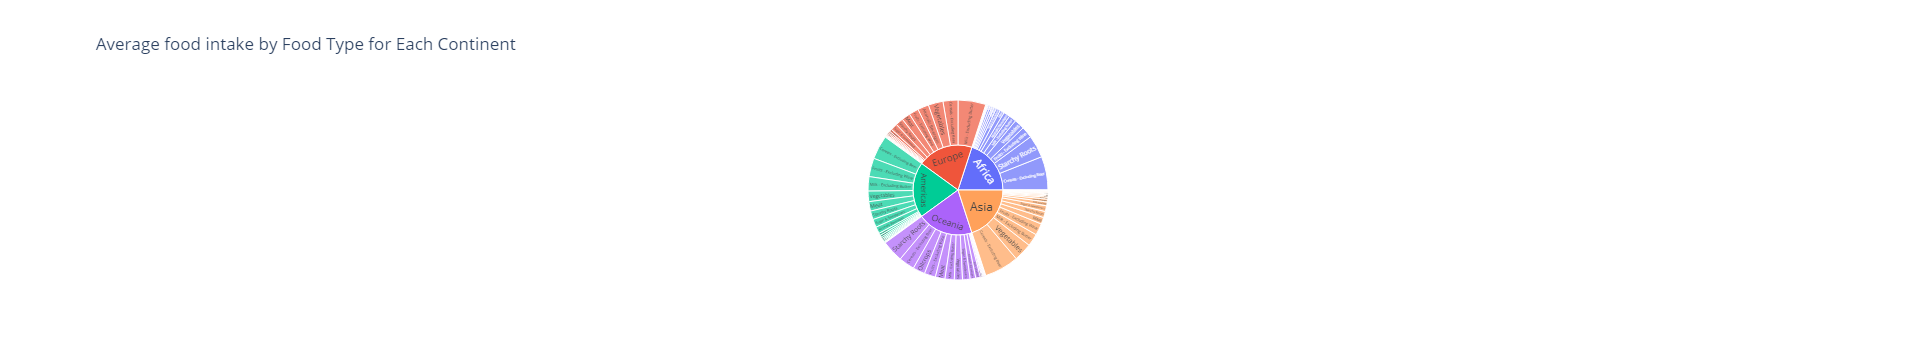

In [69]:
# create the sunburst chart using the dataframe created in the 'data wrangling' section above
fig = px.sunburst(sun, path=['region', 'level_1'], values='value', title= 'Average food intake by Food Type for Each Continent')
#display chart
fig.show()

## Comparison of obesity and undernourished rates between continents

In [73]:
# creating dataframes to visualize the relationship between the variables: Obesity, undernourishement, confirmed COVID-19 cases, COVID-19 related deaths for each continent

Africa = df.loc[df['region'] == 'Africa', ['Obesity', 'Undernourished', 'Confirmed', 'Deaths']]
Americas = df.loc[df['region'] == 'Americas', ['Obesity', 'Undernourished', 'Confirmed', 'Deaths']]
Asia = df.loc[df['region'] == 'Asia', ['Obesity', 'Undernourished', 'Confirmed', 'Deaths']]
Europe = df.loc[df['region'] == 'Europe', ['Obesity', 'Undernourished', 'Confirmed', 'Deaths']]
Oceania = df.loc[df['region'] == 'Oceania', ['Obesity', 'Undernourished', 'Confirmed', 'Deaths']]

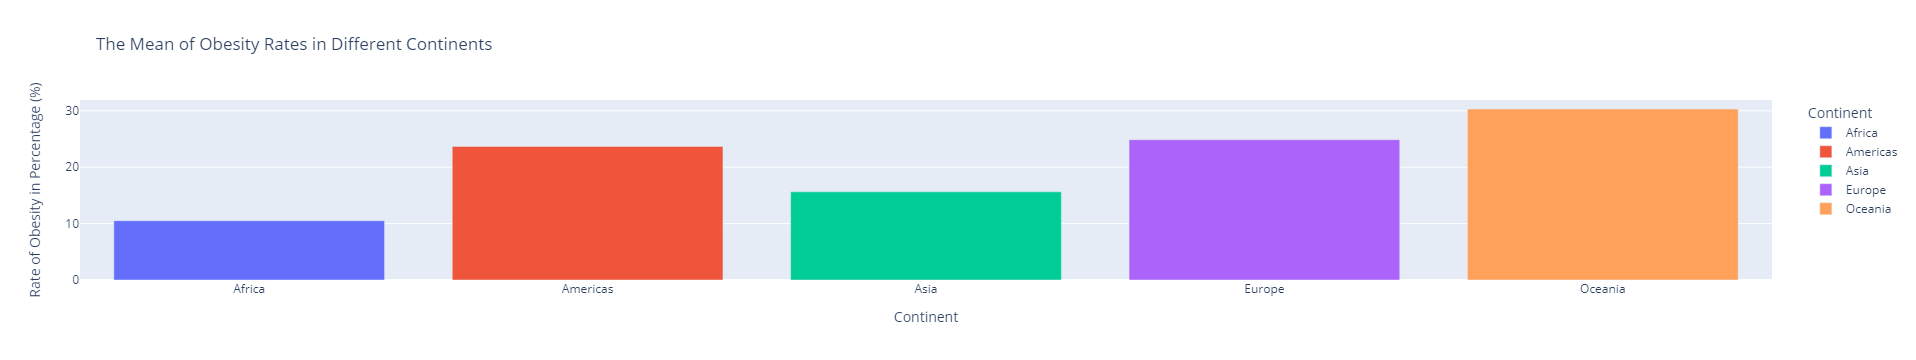

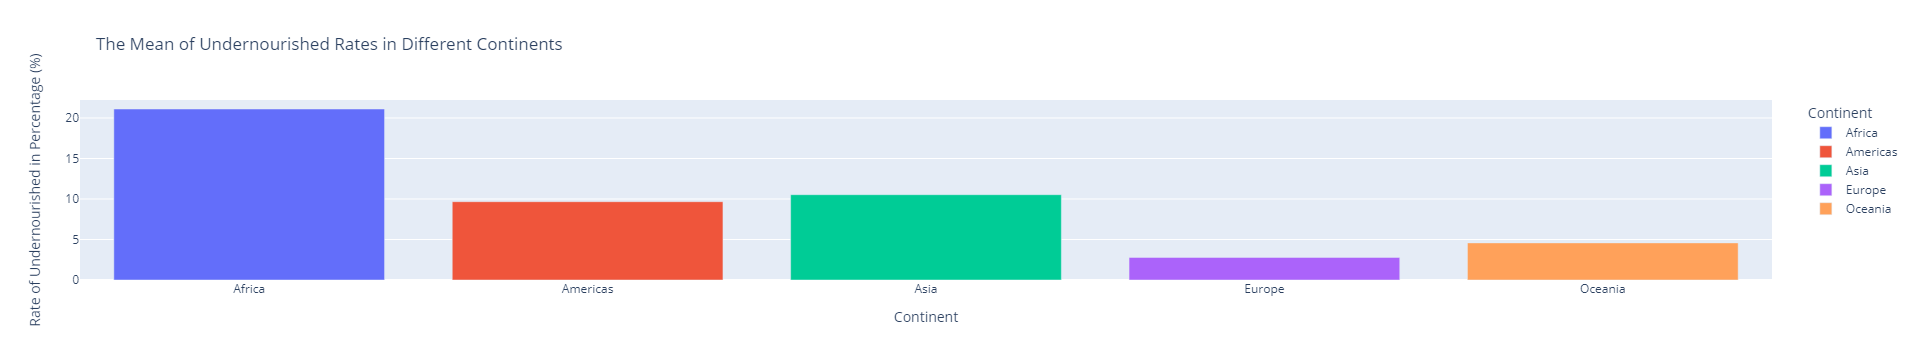

In [123]:
# create a list of all the means of obesity rate for each continent
ob = [Africa['Obesity'].mean(), Americas['Obesity'].mean(), Asia['Obesity'].mean(), Europe['Obesity'].mean(), Oceania['Obesity'].mean()]

# create a dictionary to associate the mean obesity values with each continent
dicob = {'region':['Africa','Americas','Asia','Europe','Oceania'], 'obesitymean':ob}

# convert the dictionary into a dataframe
meanob = pd.DataFrame(dicob)

# create and display the bar chart
fig1 = px.bar(meanob, x= 'region', y= 'obesitymean', color= 'region', title= "The Mean of Obesity Rates in Different Continents", labels={'obesitymean': 'Rate of Obesity in Percentage (%)', 'region':'Continent'})
fig1.show()

# create a list of all the means of undernourished rate for each continent
un = [Africa['Undernourished'].mean(), Americas['Undernourished'].mean(), Asia['Undernourished'].mean(), Europe['Undernourished'].mean(), Oceania['Undernourished'].mean()]

# create a dictionary to associate the mean undernourished values with each continent
dicun = {'region':['Africa','Americas','Asia','Europe','Oceania'], 'undernourishedmean':un}

# convert the dictionary into a dataframe
meanun = pd.DataFrame(dicun)

# create and display the bar chart
fig2 = px.bar(meanun, x= 'region', y= 'undernourishedmean', color= 'region', title= "The Mean of Undernourished Rates in Different Continents", labels={'undernourishedmean' : 'Rate of Undernourished in Percentage (%)', 'region':'Continent'})
fig2.show()

# QUESTION 1

## Part A: How are obesity and undernourishment related to the number of COVID-19 positive cases and related deaths?
***

We will visualize the relationships between the variables for ALL countries (the whole world) as bubblecharts and Pearson Correlation Coefficient:
- Deaths (as a result of COVID-19)
- Confirmed (COVID-19 Cases)
- Obesity Rates
- Undernourished Rates
- Active cases

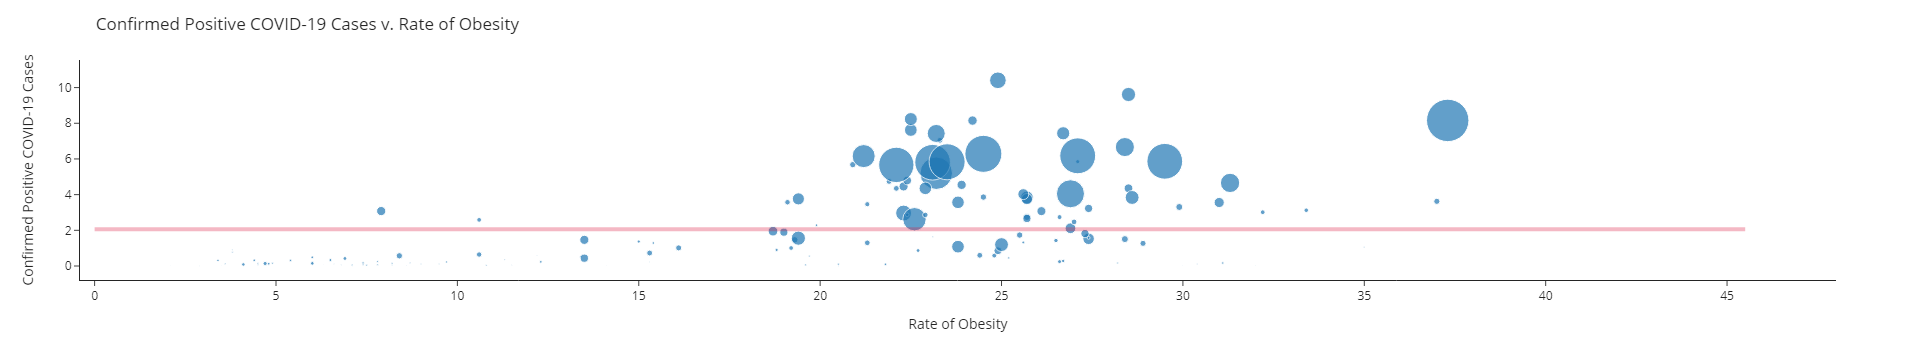

In [70]:
# creating the bubble chart 
# the three variables used are: 'obesity', 'confirmed' (positive COVID-19 cases) and 'active' (positive COVID-19 cases)
fig = px.scatter(df, x="Obesity", y = "Confirmed", size = "Active", hover_name='Country', log_x=False, size_max=30, template="simple_white")

# create a red line to display the average/mean # of 'Confirmed COVID-19 Positive Cases' across all continents
fig.add_shape(type="line", x0=0, y0=df['Confirmed'].mean(), x1=df['Obesity'].max(), y1=df['Confirmed'].mean(), line=dict(color="crimson", width=4))

# update figure title and axes labels
fig.update_layout(
    title='Confirmed Positive COVID-19 Cases v. Rate of Obesity',
    xaxis=dict(
        title='Rate of Obesity',
        gridcolor='white',
    ),
    yaxis=dict(
        title='Confirmed Positive COVID-19 Cases',
        gridcolor='white',
    ),
)

# display the bubble chart
fig.show()

This bubble chart displays a positive relationship between obesity and confirmed COVID-19 cases.

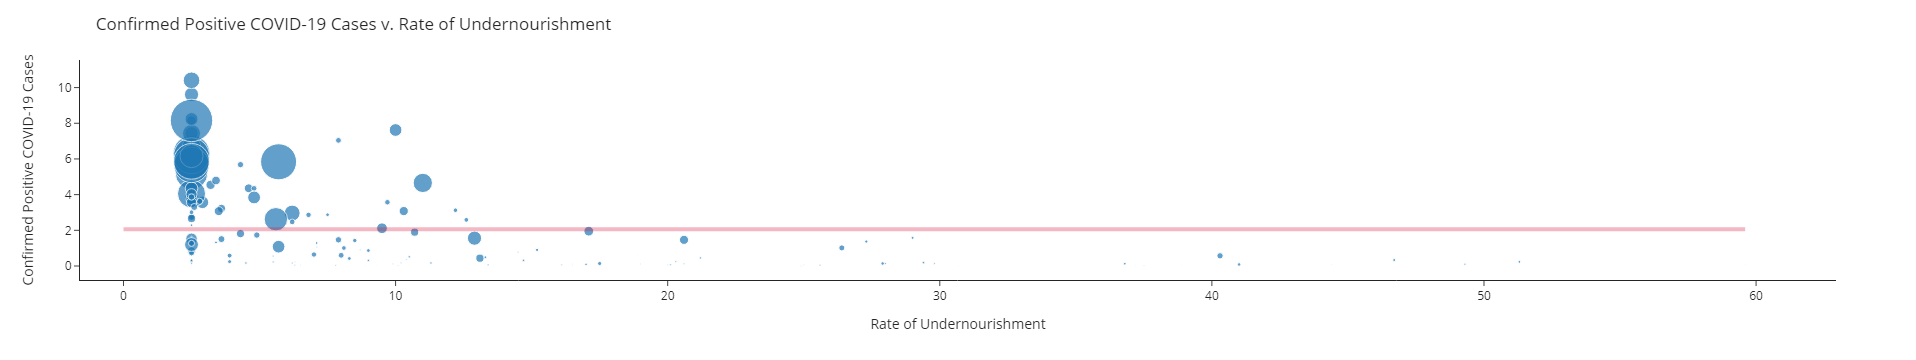

In [71]:
# creating the bubble chart 
# the three variables used are: 'undernourished', 'confirmed' (positive COVID-19 cases) and 'active' (positive COVID-19 cases)
fig = px.scatter(df, x="Undernourished", y = "Confirmed", size = "Active", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(type="line", x0=0, y0=df['Confirmed'].mean(), x1=df['Undernourished'].max(), y1=df['Confirmed'].mean(), line=dict(color="crimson", width=4))

# update figure title and axes labels
fig.update_layout(
    title='Confirmed Positive COVID-19 Cases v. Rate of Undernourishment',
    xaxis=dict(
        title='Rate of Undernourishment',
        gridcolor='white',
    ),
    yaxis=dict(
        title='Confirmed Positive COVID-19 Cases',
        gridcolor='white',
    ),
)

# display the bubble chart
fig.show()

This bubble chart displays a negative relationship between undernourishment and confirmed COVID-19 cases.

To confirm that the relationships we are seeing in the bubble charts are indeed what we think, we create a Pearson Correlation Coefficient chart.

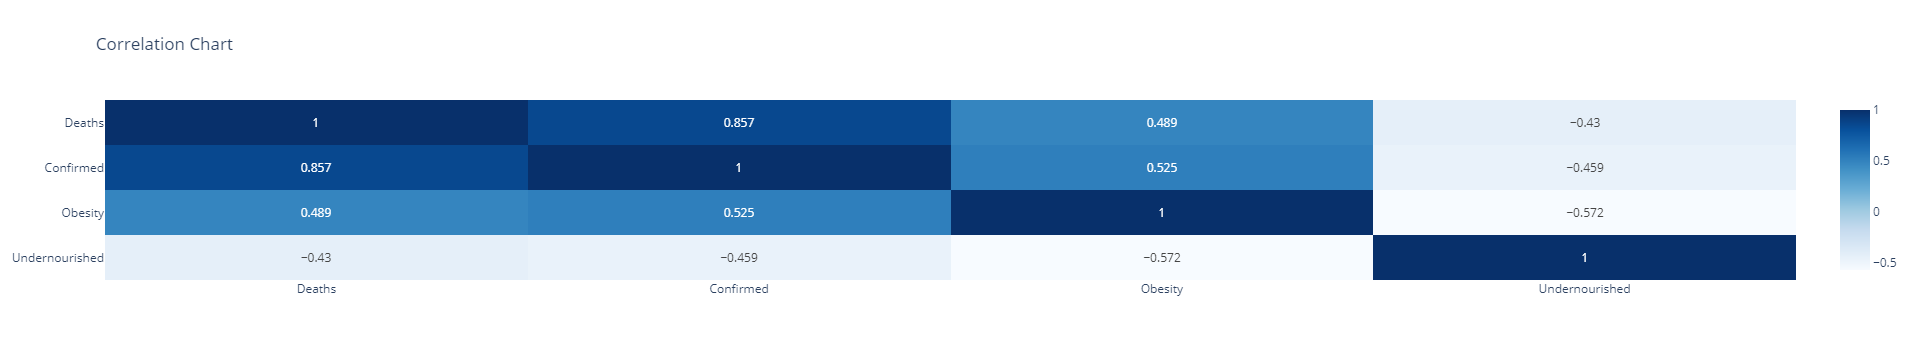

In [72]:
# create a dataframe containing data from all countries for the specific variables mentioned above
allcountries=df[['Deaths', 'Confirmed', 'Obesity', 'Undernourished']]

# Use the Pearson Correlation Coefficient to calculate the relationship strength between all the variables listed above with one another
# create a heatmap
x=allcountries.corr(method='pearson').round(3)
# used one specific colour to demonstrate the graph in luminance
px.imshow(x, text_auto=True, aspect='auto', color_continuous_scale = 'blues', title="Correlation Chart")

### Q1 Part A: Findings
***

- Obesity is positively associated with the number of confirmed COVID-19 cases (0.512) and COVID-19 related deaths (0.473). 
- Undernourishment is inversely correlated with confirmed COVID-19 cases (-0.448) and COVID-19 related deaths (-0.415).
    - This means when undernourishment decreases, confirmed COVID-19 cases and related deaths increases and vice versa.
- As one might expect, undernourishment and obesity show an inverse relationship.
    
<br>

## PART B: Are the relationships between obesity, undernourishment, COVID-19 confirmed cases and COVID-19 related deaths different between the 5 different continents?
***

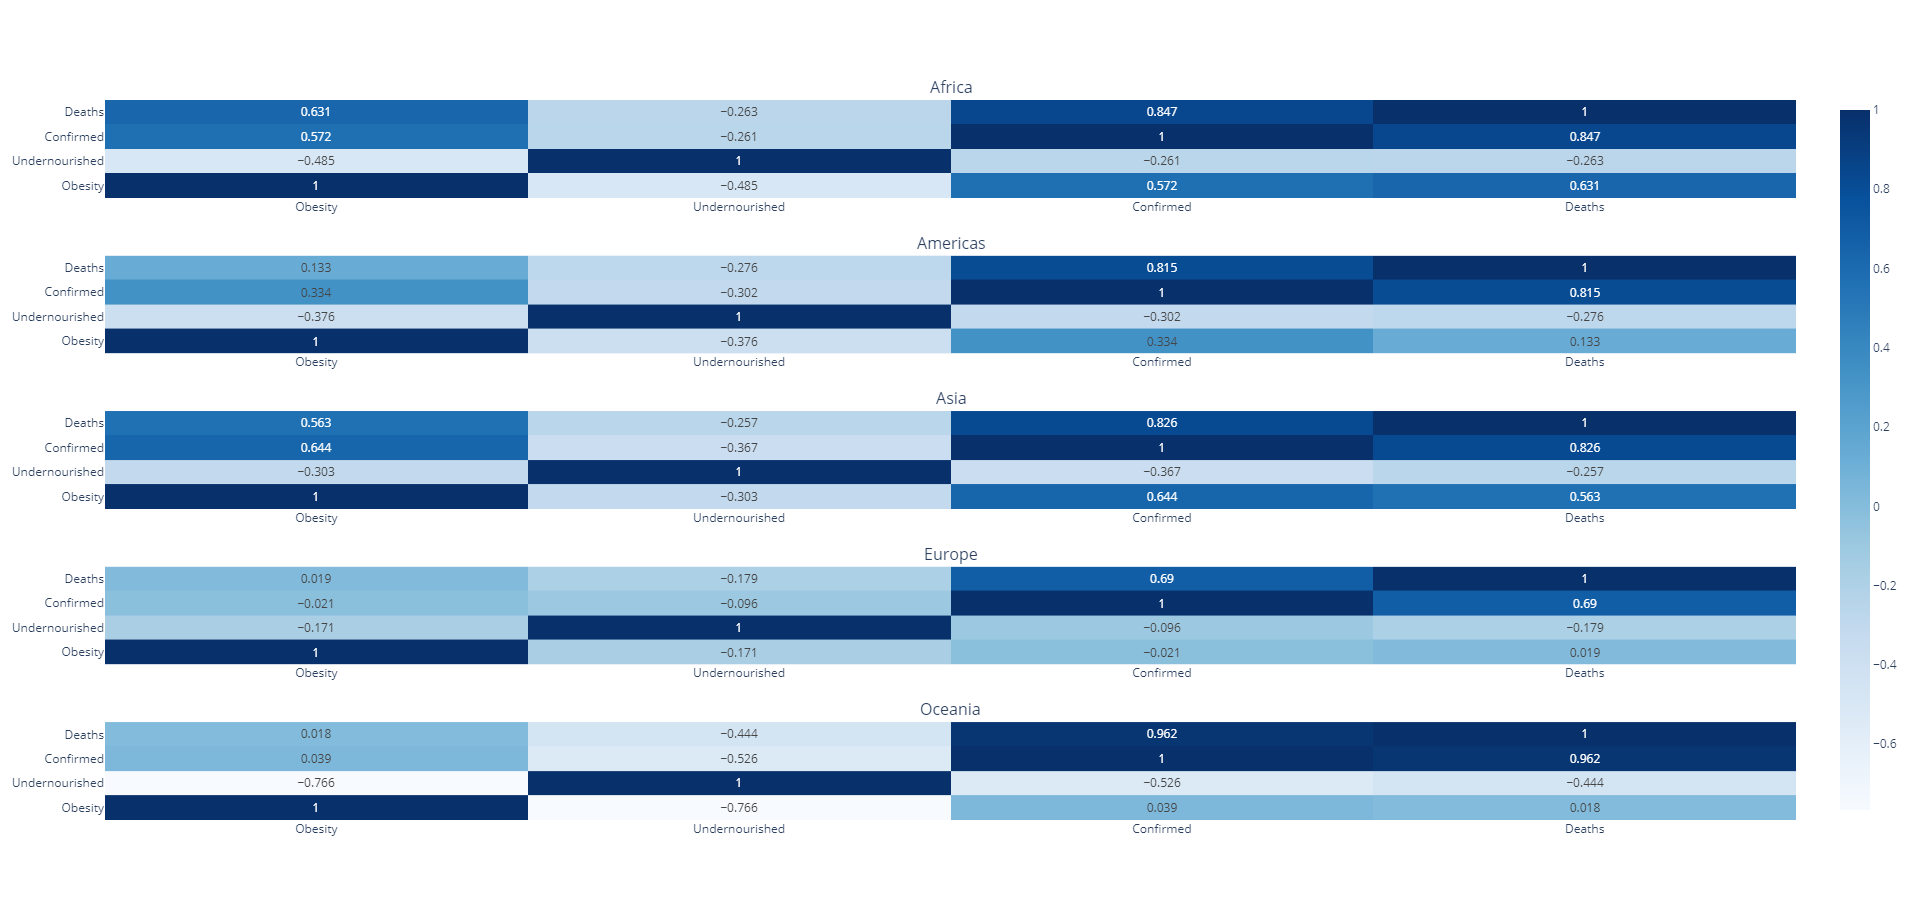

In [75]:
# create one main figure that contains the Pearson Correlation charts for each continent
fig = make_subplots(rows=5, cols=1, 
                    #row_heights=[1,1,1,1,1],
                    vertical_spacing=0.08,
                    subplot_titles=("Africa", "Americas", "Asia", "Europe", "Oceania"))

# create the correlations between all 4 variables for each continent
a = Africa.corr(method='pearson').round(3)
b = Americas.corr(method='pearson').round(3)
c = Asia.corr(method='pearson').round(3)
d = Europe.corr(method='pearson').round(3)
e = Oceania.corr(method='pearson').round(3)

# create the figures from the correlations created above
fig1 = px.imshow(a, text_auto=True, color_continuous_scale = 'blues')
fig2 = px.imshow(b, text_auto=True, color_continuous_scale = 'blues')
fig3 = px.imshow(c, text_auto=True, color_continuous_scale = 'blues')
fig4 = px.imshow(d, text_auto=True, color_continuous_scale = 'blues')
fig5 = px.imshow(e, text_auto=True, color_continuous_scale = 'blues')

# adding the figures to the main figure
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)
fig.add_trace(fig3.data[0], row=3, col=1)
fig.add_trace(fig4.data[0], row=4, col=1)
fig.add_trace(fig5.data[0], row=5, col=1)

# updated the figure layout for easier viewing
fig.update_layout(height=900, width=800, coloraxis=dict(colorscale='Blues'))
fig.show()

### Q1 Part B: Findings
***

- Correlations between the variables are similar between:
    - the Americas, Oceania and Europe
        - To our surprise, the correlation between obesity, COVID-19 positive cases and related deaths in the Americas, Europe and Oceania were weak with correlation coefficients almost at 0.
        - Undernourishment is also has a weak inverse relationship with COVID-19 related deaths and confirmed cases. This is probably because in these continents, undernourishment is low. 
            - The mean rate of undernourishment for Americas is: 9.67%.
            - The mean rate of undernourishment for Europe is: 2.79%.
            - The mean rate of undernourishment for Europe is: 4.58%.
    - Asia and Africa
        - In Asia and Africa, obesity shows a strong relationship between COVID-19 positive cases and related deaths.
- Unexpectedly, for the continent, Oceania, the negative correlation between undernourishment and COVID-19 positive cases (-0.526) and related death (-0.440) was the greatest among the five continents.
- Again, as expected in all 5 continents, undernourishment and obesity have an inverse relationship. 
    - This inverse relationship was stronger for the continents: Africa, Americas, Oceania than in Asia and Europe.

# QUESTION 2

## PART A: What are the top 3 consumed food types for each continent?
## PART B: Do the continents that share similar correlations between obesity, undernourishment, and COVID-19 Related outcomes have the same top 3 consumed food groups?
***

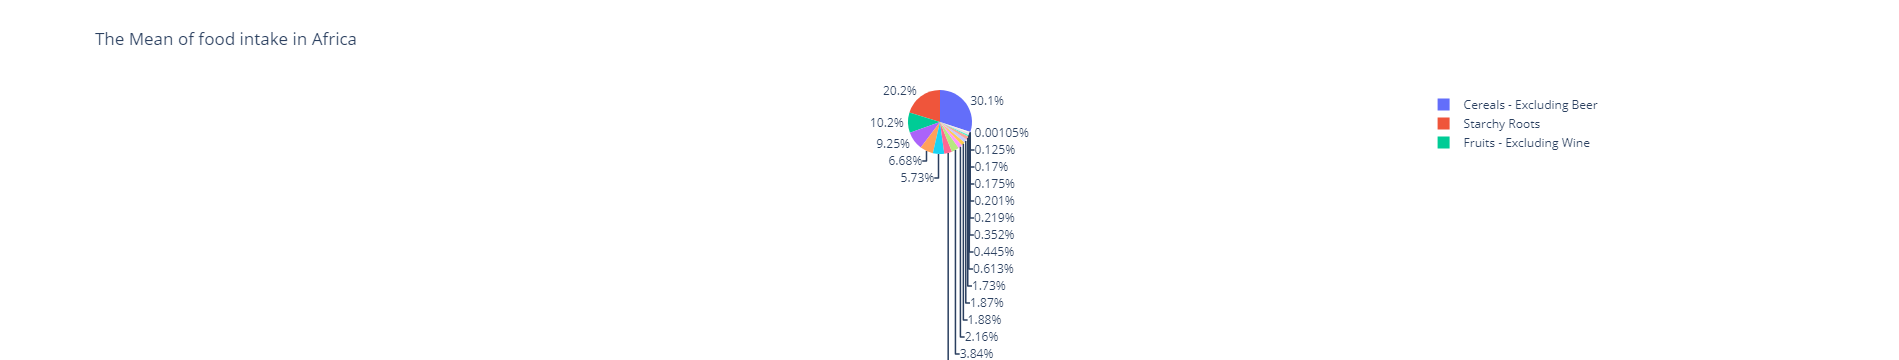

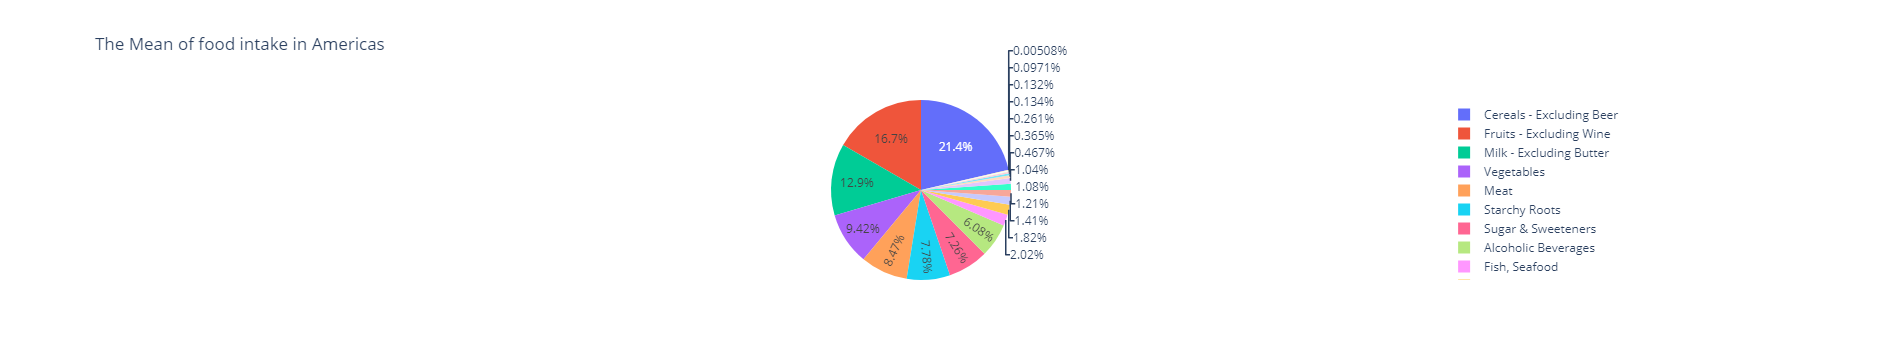

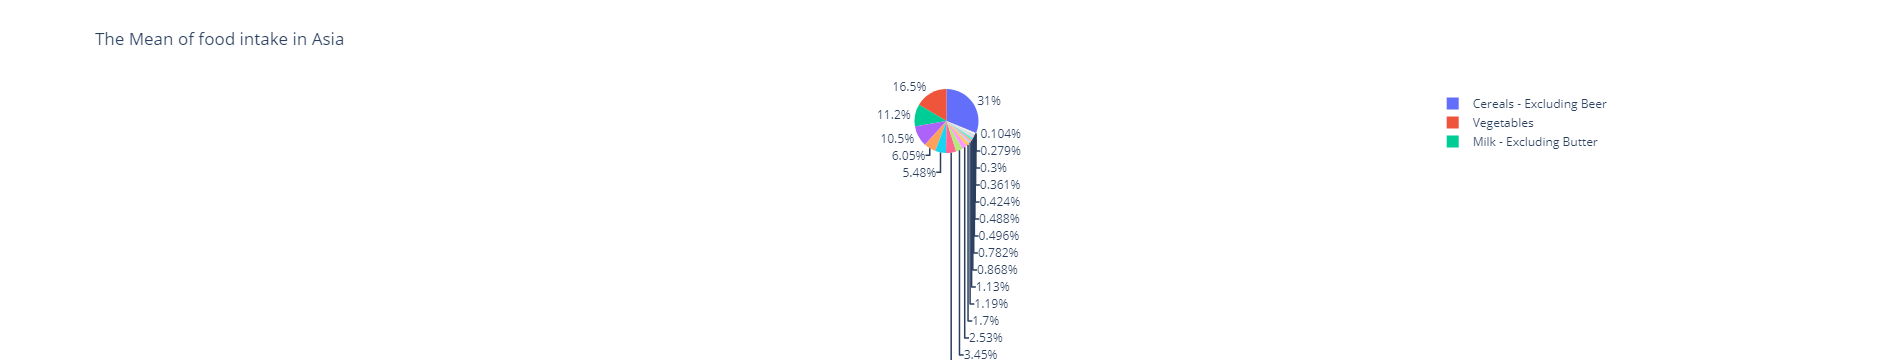

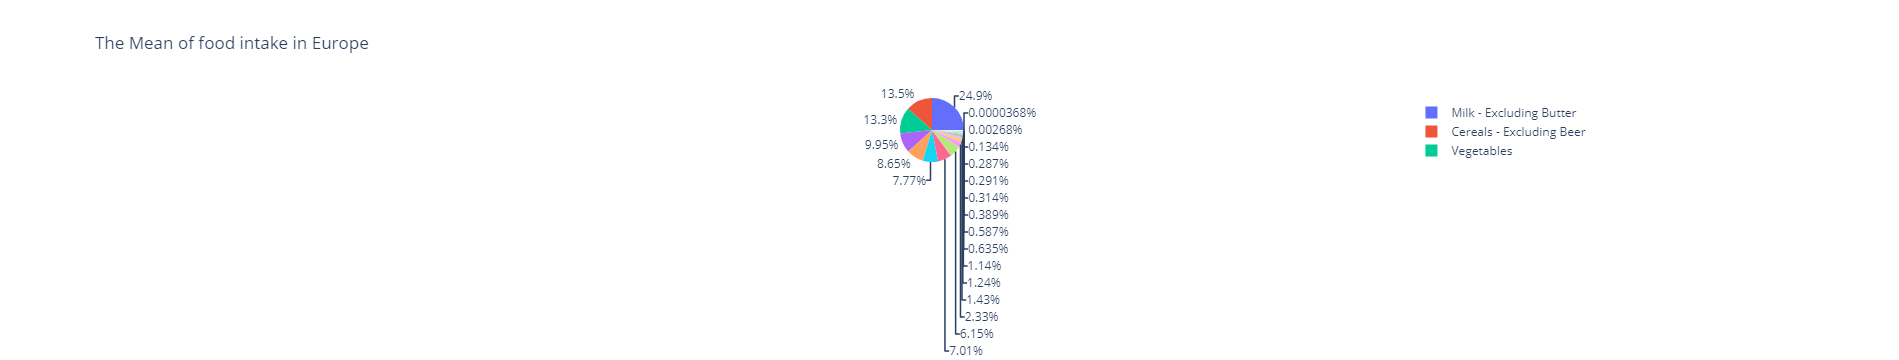

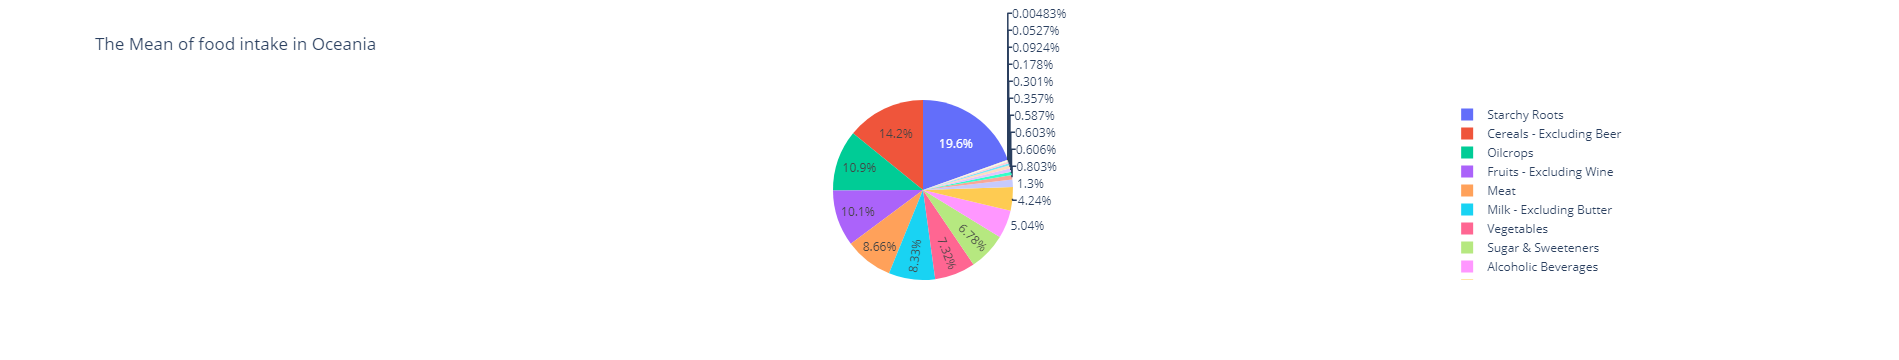

In [124]:
# create pie charts for each continent to display what the top 3 food groups are consumed

fig1 = px.pie(values= df.loc[df['region'] == 'Africa'].iloc[:,1:22].mean().tolist(), names= df.iloc[:,1:22].columns, title= 'The Mean of food intake in Africa')
fig1.show()

fig2 = px.pie(values= df.loc[df['region'] == 'Americas'].iloc[:,1:22].mean().tolist(), names= df.iloc[:,1:22].columns, title= 'The Mean of food intake in Americas')
fig2.show()

fig3 = px.pie(values= df.loc[df['region'] == 'Asia'].iloc[:,1:22].mean().tolist(), names= df.iloc[:,1:22].columns, title= 'The Mean of food intake in Asia')
fig3.show()

fig4 = px.pie(values= df.loc[df['region'] == 'Europe'].iloc[:,1:22].mean().tolist(), names= df.iloc[:,1:22].columns, title= 'The Mean of food intake in Europe')
fig4.show()

fig5 = px.pie(values= df.loc[df['region'] == 'Oceania'].iloc[:,1:22].mean().tolist(), names= df.iloc[:,1:22].columns, title= 'The Mean of food intake in Oceania')
fig5.show()

In [78]:
# code to create the dataframe for viewing below (easier to view top 3 in a table)

top3 = {'1st': pd.Series(['Cereals', 'Cereals', 'Cereals', 'Milk', 'Starchy Roots'],
                      index=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']),
    '2nd': pd.Series(['Starchy Roots', 'Fruits', 'Vegetables', 'Cereals', 'Cereals'],
                      index=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']),
    '3rd': pd.Series(['Fruits', 'Milk', 'Milk', 'Vegetables', 'Oilcrops'],
                      index=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])
    }

### Q2 Part A & B: Findings

The list of top 3 foods consumed for each continent were:

***

In [79]:
display(pd.DataFrame(top3))

,1st,2nd,3rd
Africa,Cereals,Starchy Roots,Fruits
Americas,Cereals,Fruits,Milk
Asia,Cereals,Vegetables,Milk
Europe,Milk,Cereals,Vegetables
Oceania,Starchy Roots,Cereals,Oilcrops


Taking a look at the table and also the Pearson Correlation Coefficient charts above in question 1, we found that:
- Africa and Asia have very similar correlations between obesity and COVID-19 outcomes, and between undernourishment and COVID-19 outcomes, but the only share one top consumed food group, cereals.
- Africa, Americas, Asia and Oceania have very similar correlations between undernourishment and COVID-19 outcomes, and between undernourishment and COVID-19 outcomesm but between all of them the only common top consumed food group, was cereals.
- Europe and Oceania have very similar correlations between obesity and COVID-19 outcomes, but they only share 1 top consumed food group, cereals.

Unfortunately, there was no clear relationship between food groups and continents and did not provide us any useful or interesting findings. Thus, we decided to group these countries by their rate of obesity and rate of undernourishment instead of by continent (see next question). 

## PART C: Are the top (3) consumed food groups similar or different between countries with high and low rates of obesity and between countries with high and low rates of undernourishment?
***

In [81]:
# we are classifying countries that have high obesity rates as countries that have a higher obesity rate than the average obesity rate calculated
# we are classifying countries that have low obseity rates as countries that have lower obesity rates than the average obesity rate calculated
# create dataframes containing countries that have high obesity rates and countries that hvae low obesity rates
# classify countries by the level of their obesity and create dataframes based on this rule

obesityhigh = df.loc[df['Obesity'] > df['Obesity'].mean()]
obesitylow = df.loc[df['Obesity'] <= df['Obesity'].mean()]
#obesitylow.head()

In [82]:
# obtain the mean of undernourishment (for all countries/continents)
#df['Undernourished'].mean()

In [83]:
# we are classifying countries that have high obesity rates as countries that have a higher obesity rate than the average undernourishment rate calculated
# we are classifying countries that have low obseity rates as countries that have lower obesity rates than the average undernourishment rate calculated
# classify countries by the level of their undernourishment and create dataframes based on the rule above

undernourishedhigh = df.loc[df['Undernourished'] > df['Undernourished'].mean()]
undernourishedlow = df.loc[df['Undernourished'] <= df['Undernourished'].mean()]
#undernourishedhigh.head()

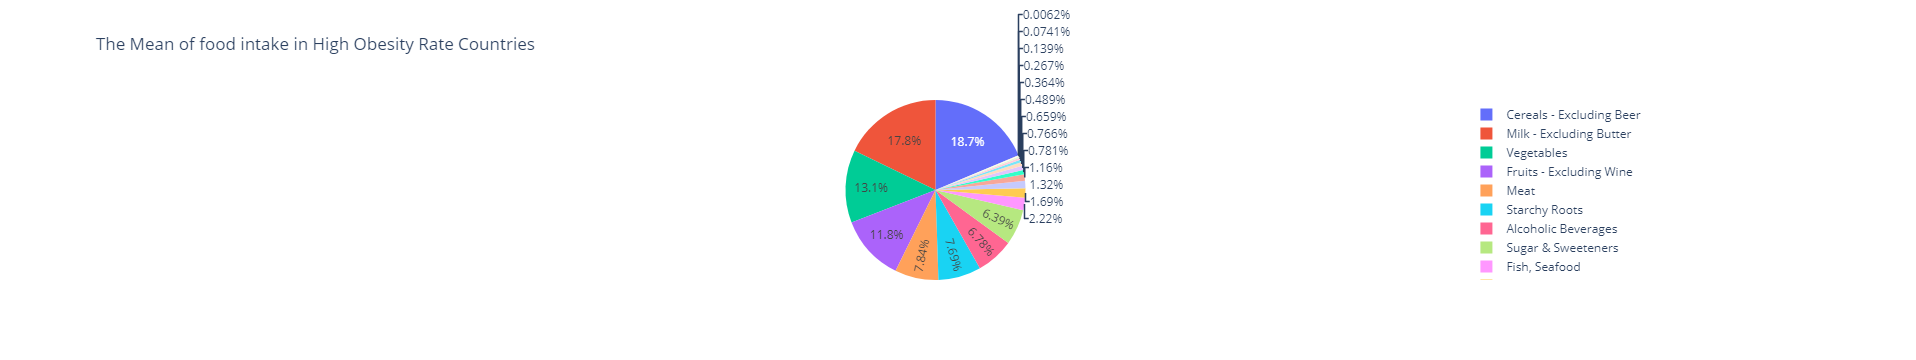

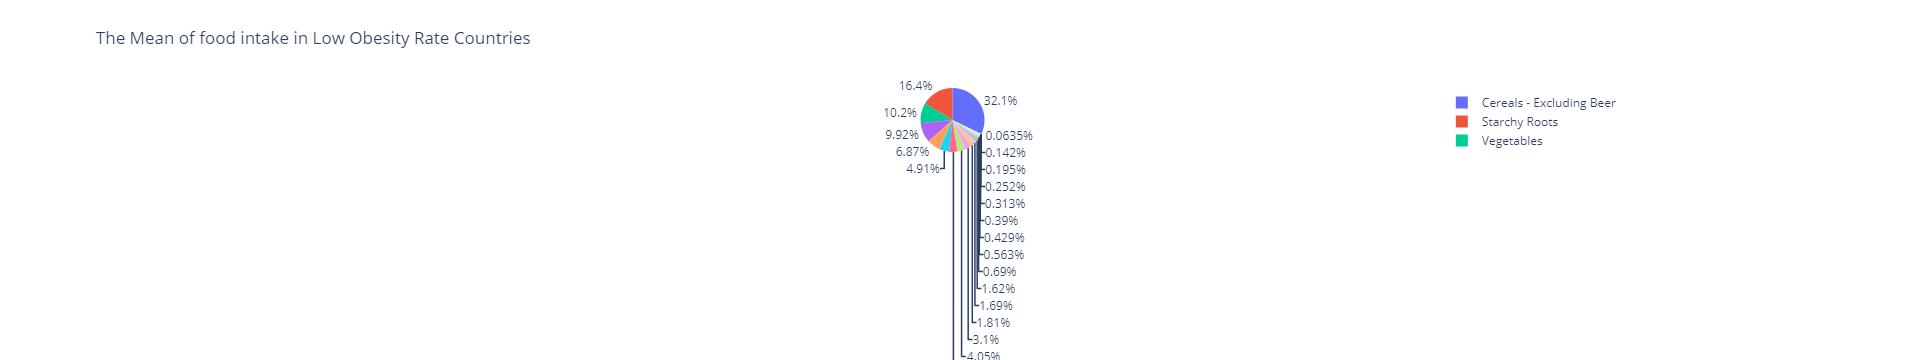

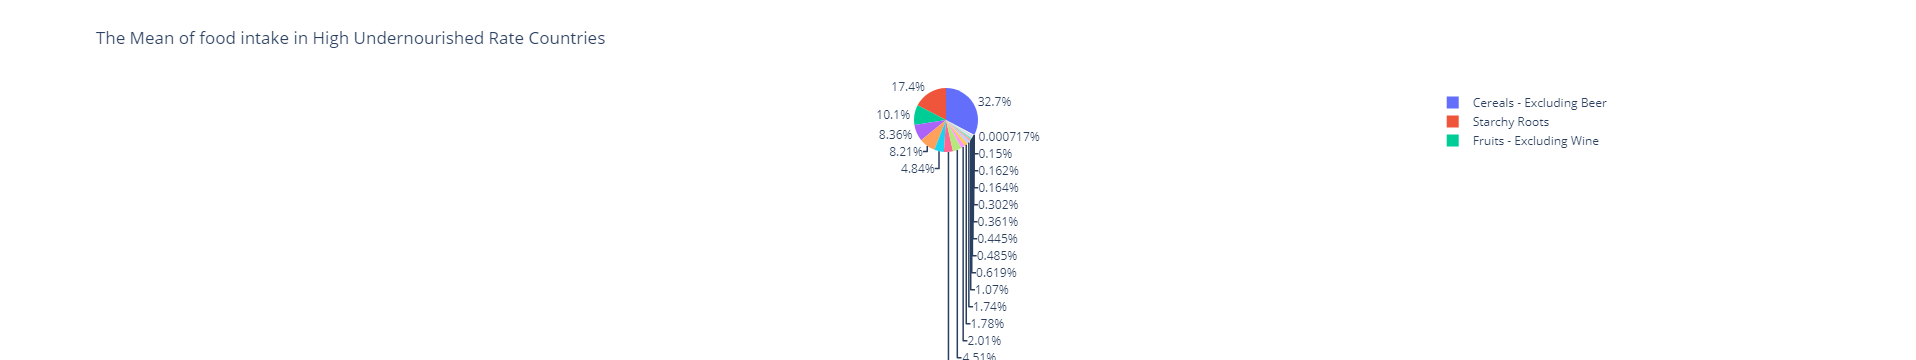

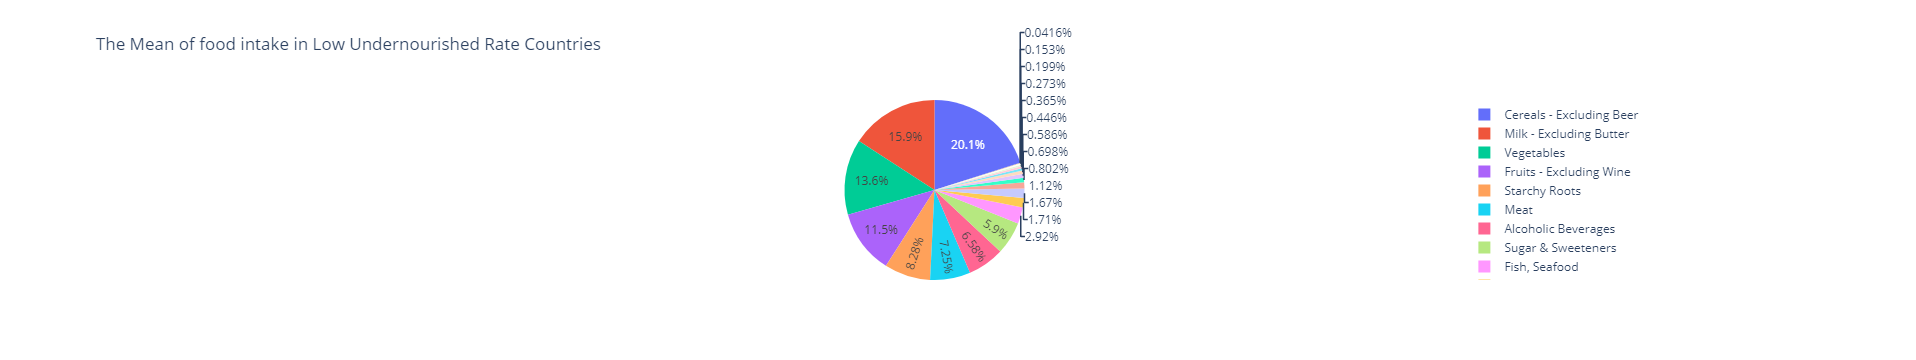

In [84]:
# create pie charts to visualize what food types are more prevalent for countries that have higher than average obesity rates, and for countries that have lower than average obesity rates

fig1 = px.pie(values= obesityhigh.iloc[:,1:22].mean(), names= obesityhigh.iloc[:,1:22].columns, title='The Mean of food intake in High Obesity Rate Countries')
fig1.show()

fig2 = px.pie(values= obesitylow.iloc[:,1:22].mean(), names= obesitylow.iloc[:,1:22].columns, title='The Mean of food intake in Low Obesity Rate Countries')
fig2.show()

# create pie charts to visualize what food types are more prevalent for countries that have higher than average undernourishment rates, and for countries that have lower than average undernourishment rates

fig3 = px.pie(values= undernourishedhigh.iloc[:,1:22].mean(), names= undernourishedhigh.iloc[:,1:22].columns, title='The Mean of food intake in High Undernourished Rate Countries')
fig3.show()

fig4 = px.pie(values= undernourishedlow.iloc[:,1:22].mean(), names= undernourishedlow.iloc[:,1:22].columns, title='The Mean of food intake in Low Undernourished Rate Countries')
fig4.show()

### Q2 Part C: Findings

- Cereals (Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products) are always in the top 2 food groups that are consumed across all continents

Top 3 Food Groups for:

Countries with __high__ obesity:
- Cereals (excludes beer)
- _Milk (excludes butter)_
- Vegetables

Countries with __low__ obesity:
- Cereals (excludes beer)
- _Starchy Roots_
- Vegetables

Comparing the food groups, we may want to look more closely at the intake of the food groups: milk and starchy roots for both groups: countries with high or low obesity rates. <br>
For high obesity countries: starchy roots make up 15% of their diet vs. 16.4% (in countries with low obesity rates). <br>
For low obesity countries: milk (exclused butter) make up 7.78% vs. 17.8% (in countries with high obesity rates).

Countries with __high__ rate of undernourishment:
- Cereals (excludes beer)
- Starchy Roots
- Fruits (excluding wine)

Countries with __low__ rate of undernourishment:
- Cereals (excludes beer)
- Milk (excludes butter)
- Vegetables
***

## PART D: How do the main food groups vegetal and animal products compare between countries with high and low rates obesity. What about between countries with rate high or low rates of undernourishment?

In [85]:
# create lists containing all animal items, as suggested by the food description file, "Supply_Food_Data_Descriptions.csv" included in the dataset (Kaggle, 2021) 
# we will use these lists to help us look at animal products and vegetal products intake for high/low obesity countries

animalitems = ['Animal fats', 'Aquatic Products, Other', 'Eggs', 'Fish, Seafood', 'Meat', 'Milk - Excluding Butter', 'Offals']
vegetalitems = ['Alcoholic Beverages', 'Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Miscellaneous', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables']

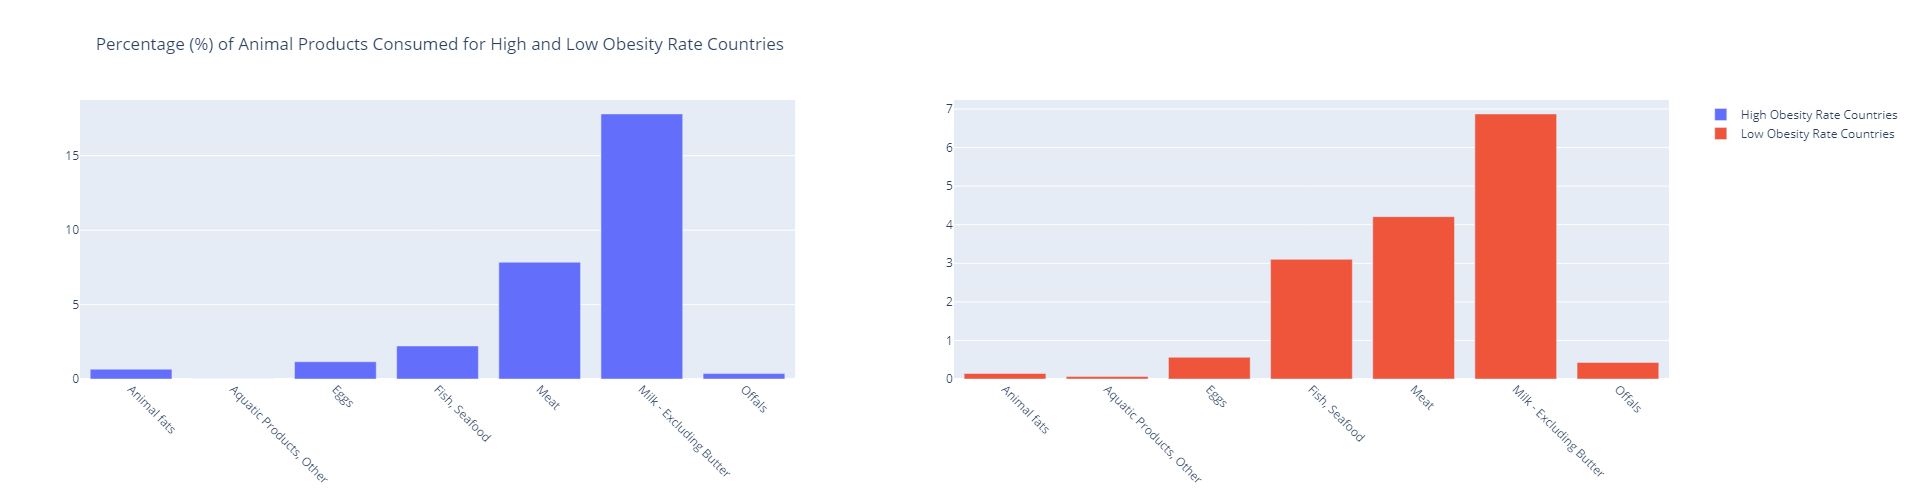

In [125]:
# create a main plot to add graphs to so they show together

fig = make_subplots(rows=1, cols=2)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name="High Obesity Rate Countries", x=animalitems, y=obesityhigh[animalitems].mean()),
    row=1, col=1
)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name="Low Obesity Rate Countries", x=animalitems, y=obesitylow[animalitems].mean()),
    row=1, col=2
)
# add the graph to the main graph
fig.update_layout(height=500, width=1000, 
                  title_text = "Percentage (%) of Animal Products Consumed for High and Low Obesity Rate Countries",
                  font=dict(
                      size=12),
                 )

# update the main figure to have the variables angled so they are easier to read and take up less space
fig.update_xaxes(tickangle = 45)
# display the graph
fig.show()

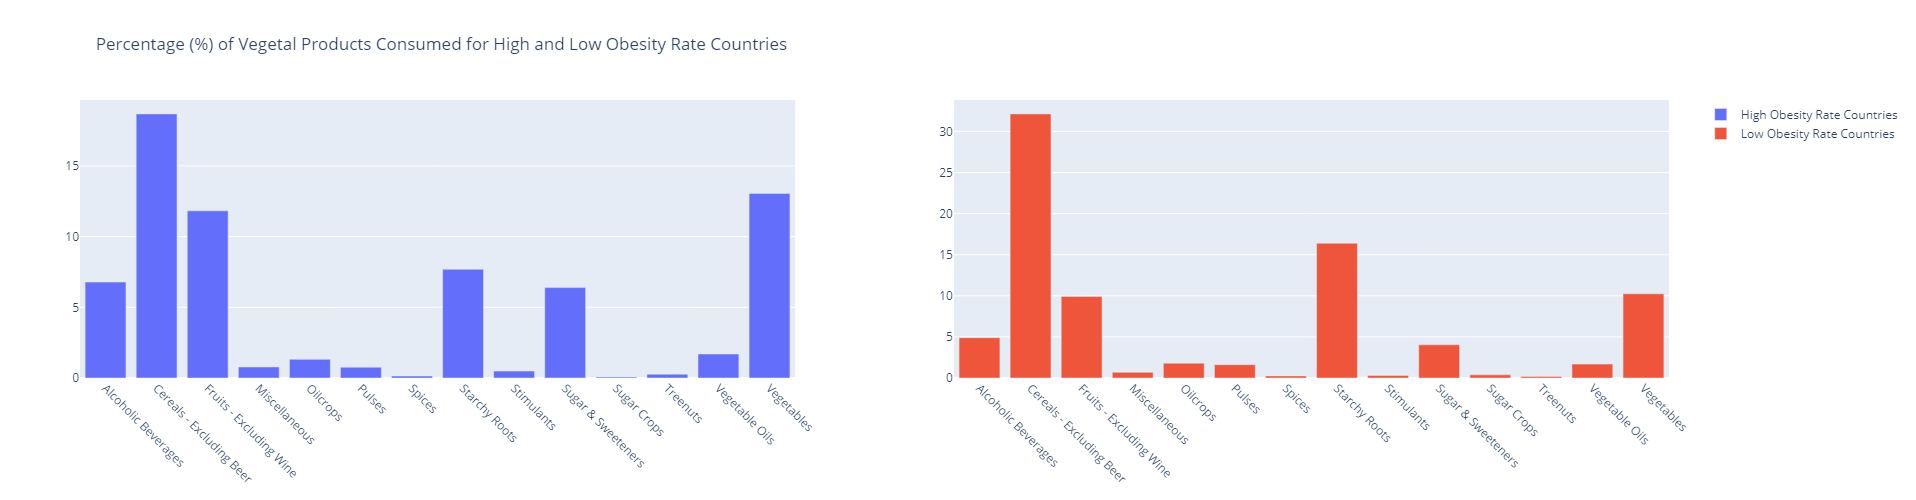

In [87]:
# create a main figure to add graphs to so they show together
fig = make_subplots(rows=1, cols=2)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name="High Obesity Rate Countries", x=vegetalitems, y=obesityhigh[vegetalitems].mean()),
    row=1, col=1
)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name="Low Obesity Rate Countries", x=vegetalitems, y=obesitylow[vegetalitems].mean()),
    row=1, col=2
)

# update the layout of the figure to configure the title and font size
fig.update_layout(height=500, width=1000, 
                  title_text = "Percentage (%) of Vegetal Products Consumed for High and Low Obesity Rate Countries",
                  font=dict(
                      size=12),
                 )
# update the main figure to have the variables angled so they are easier to read and take up less space
fig.update_xaxes(tickangle = 45)
fig.show()

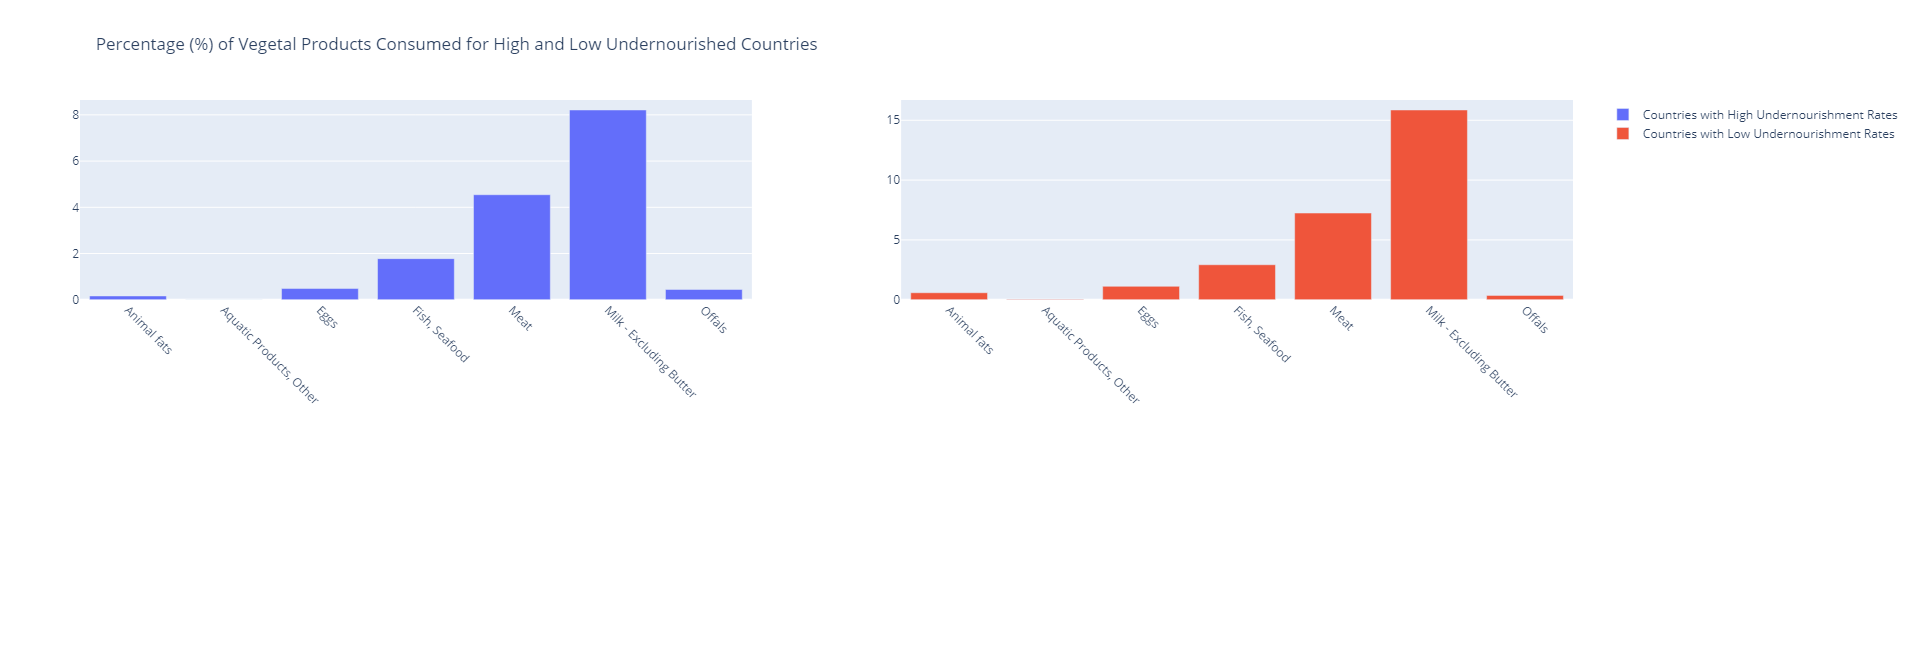

In [88]:
# create a main figure to add graphs to so they show together
fig = make_subplots(rows=2, cols=2)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name= "Countries with High Undernourishment Rates", x=animalitems, y=undernourishedhigh[animalitems].mean()),
    row=1, col=1
)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name= "Countries with Low Undernourishment Rates", x=animalitems, y=undernourishedlow[animalitems].mean()),
    row=1, col=2
)

# update the layout of the figure to configure the title and font size
fig.update_layout(height=650, width=1200, 
                  title_text="Percentage (%) of Vegetal Products Consumed for High and Low Undernourished Countries",
                  font=dict(
                      size=12),
                 )

# update the main figure to have the variables angled so they are easier to read and take up less space
fig.update_xaxes(tickangle = 45)

# display the figure
fig.show()

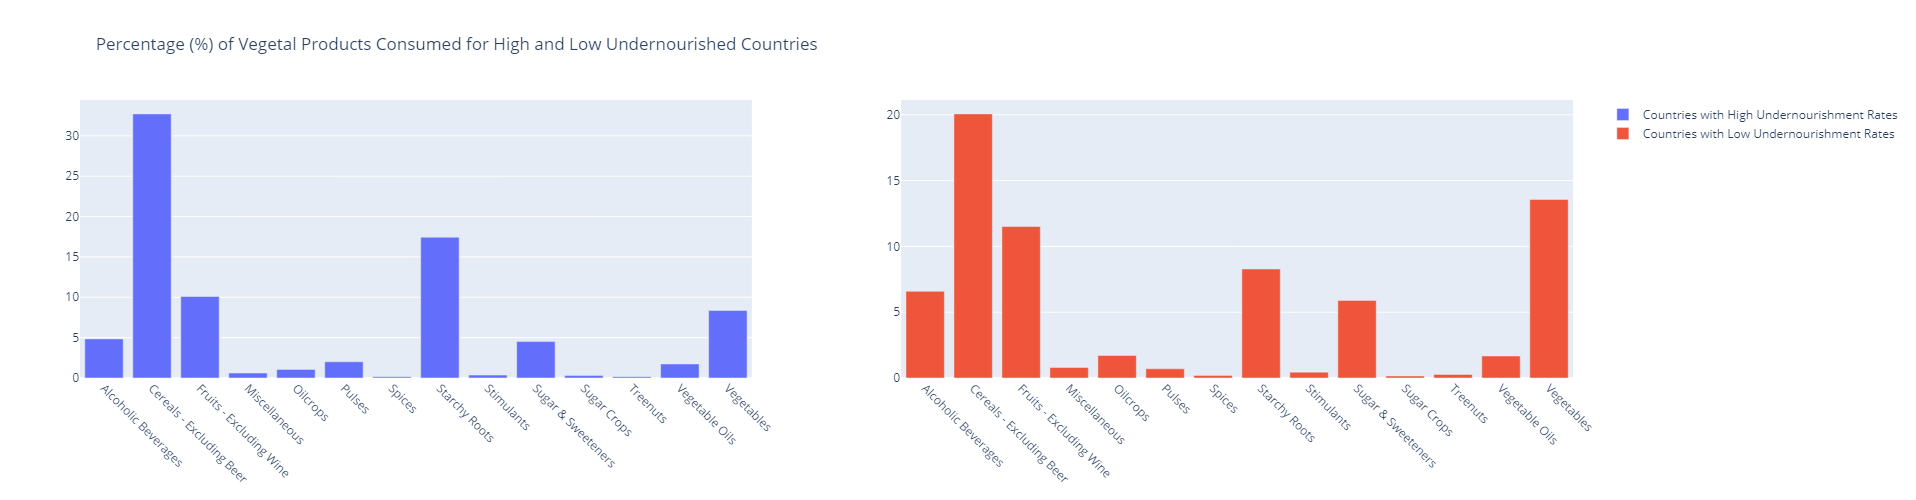

In [89]:
# create a main figure to add graphs to so they show together
fig = make_subplots(rows=1, cols=2)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name= "Countries with High Undernourishment Rates", x=vegetalitems, y=undernourishedhigh[vegetalitems].mean()),
    row=1, col=1
)

# add the graph to the main graph
fig.add_trace(
    go.Bar(name= "Countries with Low Undernourishment Rates", x=vegetalitems, y=undernourishedlow[vegetalitems].mean()),
    row=1, col=2
)

# update the layout of the figure to configure the title and font size
fig.update_layout(height=500, width=1000, 
                  title_text="Percentage (%) of Vegetal Products Consumed for High and Low Undernourished Countries",
                  font=dict(
                      size=12),
                 )

# update the main figure to have the variables angled so they are easier to read and take up less space
fig.update_xaxes(tickangle = 45)

# display
fig.show()

### Visualize the relationship between the main food groups: animal products and vegetal products

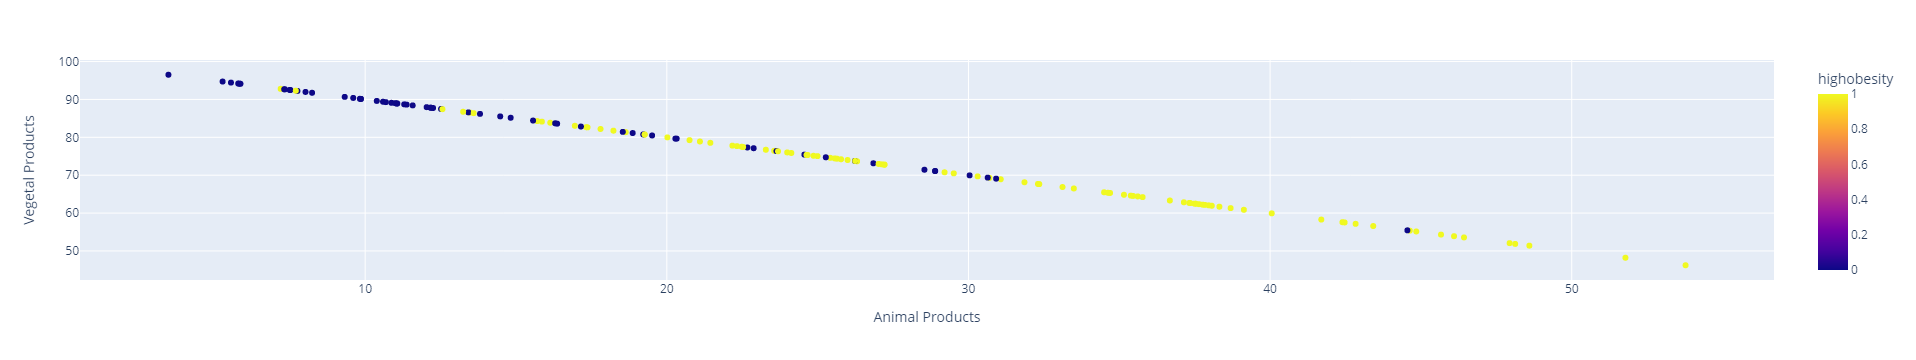

In [91]:
# create the dataframe
dff['highobesity'] = (dff["Obesity"] > df['Obesity'].mean()).astype(int)
#display(dff)

# create the scatterplot to show the relationship
fig = px.scatter(dff, x= 'Animal Products', y='Vegetal Products', color= 'highobesity', hover_name= 'Country')

# show plot
fig.show()

### Q2 Part D: Findings

- When more vegetal products are consumed, less animal products are consumed and vice versa (an inverse relationship is shown between these variables)
- Countries that consume more animal products seem to experience higher obesity in their population

***

# QUESTION 3:

## PART A: What percentage of Canada’s population is obese, and how is the average Canadian’s diet related to the number of COVID-19 positive cases and related deaths?¶
***

In [ ]:
# multiplying the sub food groups by 2 because they make up each group by 2
canada.iloc[:,1:24] = canada.iloc[:,1:24] *2

# display the dataframe for checking
display(canada)

# remove main food groups so we can just look at the sub groups that make the main groups
canada = canada.drop(labels=['Animal Products', 'Vegetal Products'], axis=1)

# check the values to make sure they look correct
display(canada.iloc[0,1:22].values)

# checking the world rate of obesity mean
print(df['Obesity'].mean())

In [93]:
display(canada.iloc[:,1:22].columns)

Index(['Alcoholic Beverages', 'Animal fats', 'Aquatic Products, Other',
       'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood',
       'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter',
       'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops',
       'Treenuts', 'Vegetable Oils', 'Vegetables'],
      dtype='object')

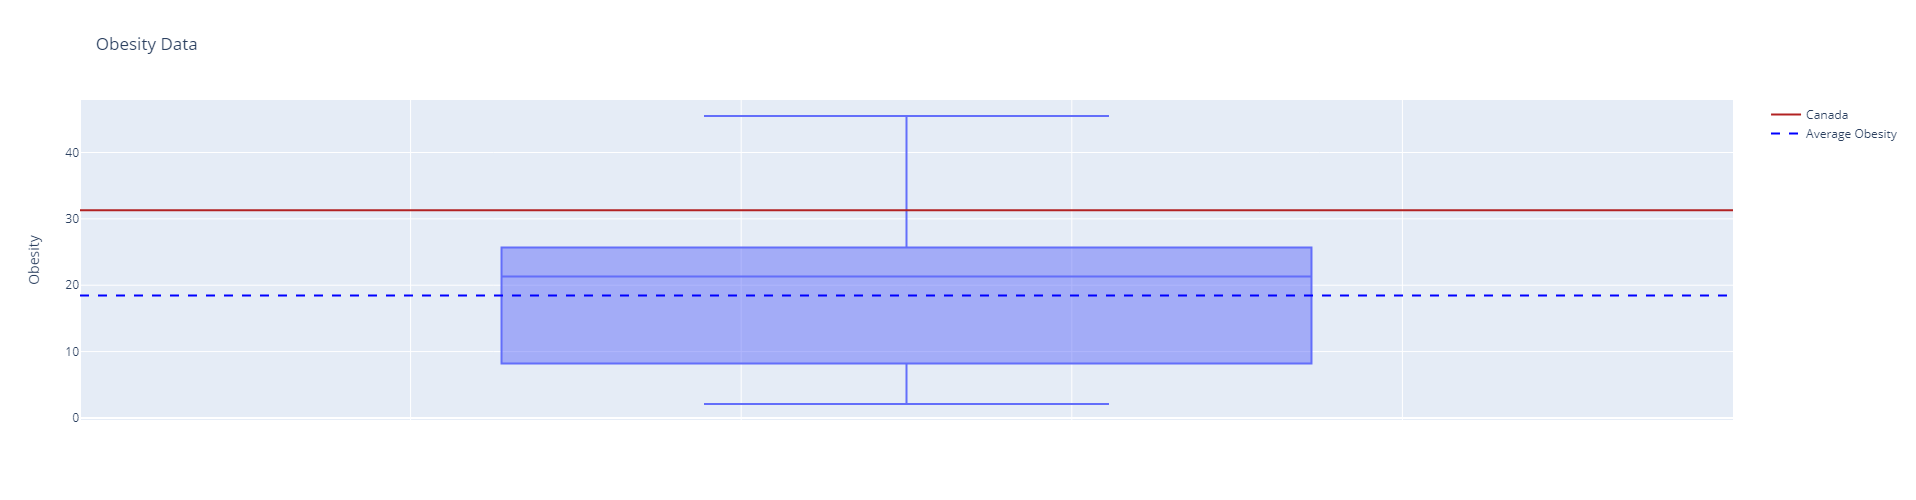

In [127]:
# created a copy of the initial dataframe to make sure we do not mess up the initial data frame
dfCOPY = df.copy(deep=True)

# update the layout of the figure to configure the title and font size
fig = px.box(dfCOPY, y="Obesity", height = 500, width=450, title="Obesity Data")


# add the lines to show Canada's obesity rate and the average obesity rate of the world for easy comparison in chart
fig.layout.xaxis2 = go.layout.XAxis(overlaying='x', range=[0, 1], showticklabels=False)
fig.add_scatter(x = [0, 1], y = [31.3, 31.3], mode='lines', xaxis='x2', showlegend=True, line=dict(color = "firebrick", width = 2),name="Canada")
fig.add_scatter(x = [0, 1], y = [df['Obesity'].mean(), df['Obesity'].mean()], mode='lines', xaxis='x2', showlegend=True, line=dict(dash='dash', color = "blue", width = 2),name="Average Obesity")

#display
fig.show()

## Q3 Part A: Findings

Based on the boxplot above, we can see that the obesity rate for the Canadian population was 31.3%, which is higher than the world average of 18.6% (a 12.7% difference).

## PART B: Is the average Canadian diet reflective of the Canadian diet guidelines?
***

Before comparing the Canadian diet to the Canadian Food Guideline, let's look at some of the most consumed food groups on average for Canada.

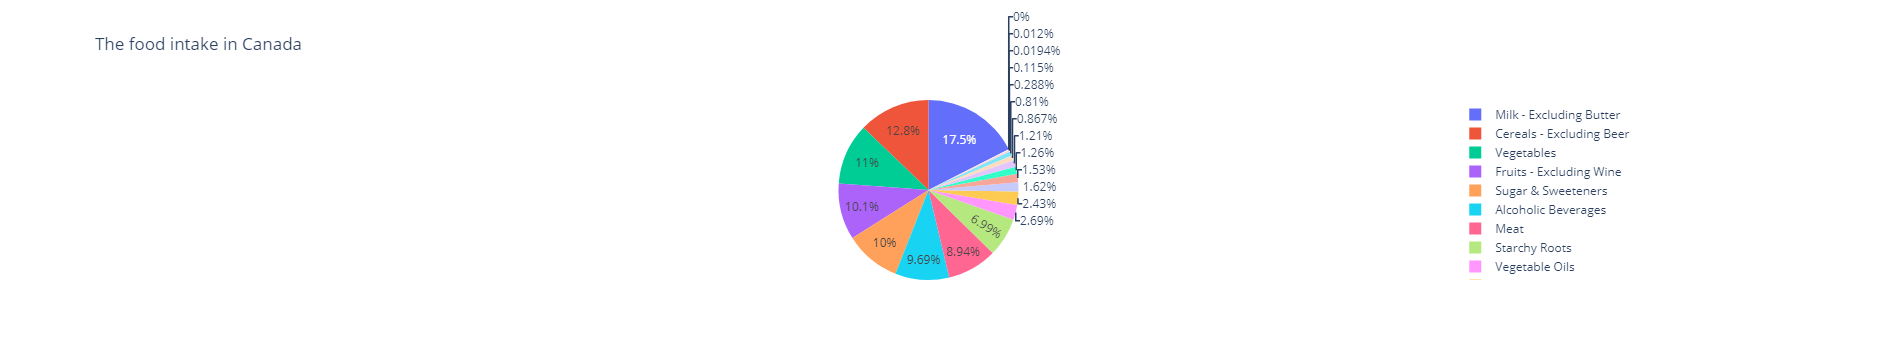

In [95]:
# create a pie chart to display all the food that 
fig = px.pie(values=canada.iloc[0,1:22].values, names=canada.iloc[:,1:22].columns, title= 'The food intake in Canada')
fig.show()

We decided to also take a look at the top 3 food sub groups consumed by Canadians. These food groups are: Milk, Cereals and Vegetables.

The top five food groups consumed on average in Canada are: milk (17.5%), cereals (12.8%), vegetables(11.0%), fruits (10.1%), sugar and sweeteners (10.0%).

In [96]:
# converting column names so they are consistent with the data set
canada['vegetables and fruits'] = canada['Vegetables'] + canada['Fruits - Excluding Wine'] + canada['Starchy Roots'] + canada['Sugar Crops']
canada['protein foods'] = canada['Aquatic Products, Other'] + canada['Eggs'] + canada['Fish, Seafood'] + canada['Meat'] + canada['Milk - Excluding Butter'] + canada['Offals'] + canada['Pulses'] + canada['Treenuts']
canada['whole grain foods'] = canada['Cereals - Excluding Beer']

# sum up the percentage of the food groups outlined in Canada's food guideline for creating bar chart and comparison
sum = canada.iloc[:,-3:].sum(axis=1)
canada['vegetables and fruits'] = canada['vegetables and fruits']/sum
canada['protein foods'] = canada['protein foods']/sum
canada['whole grain foods'] = canada['whole grain foods']/sum

#display(canada) data frame for checking purchases 
canada = canada.append({'Country':'Official','vegetables and fruits':0.5,'protein foods':0.25,'whole grain foods':0.25},ignore_index=True)
display(canada)

/tmp/ipykernel_100/49001978.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Country,Alcoholic Beverages,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),vegetables and fruits,protein foods,whole grain foods
0,Canada,9.6882,1.6168,0.012,12.8472,1.5336,2.4296,10.1384,8.9414,17.5192,...,<2.5,2.109961,0.054203,1.909848,NaN,38190000.0,%,0.385347,0.438591,0.176062
1,Official,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.250000,0.250000


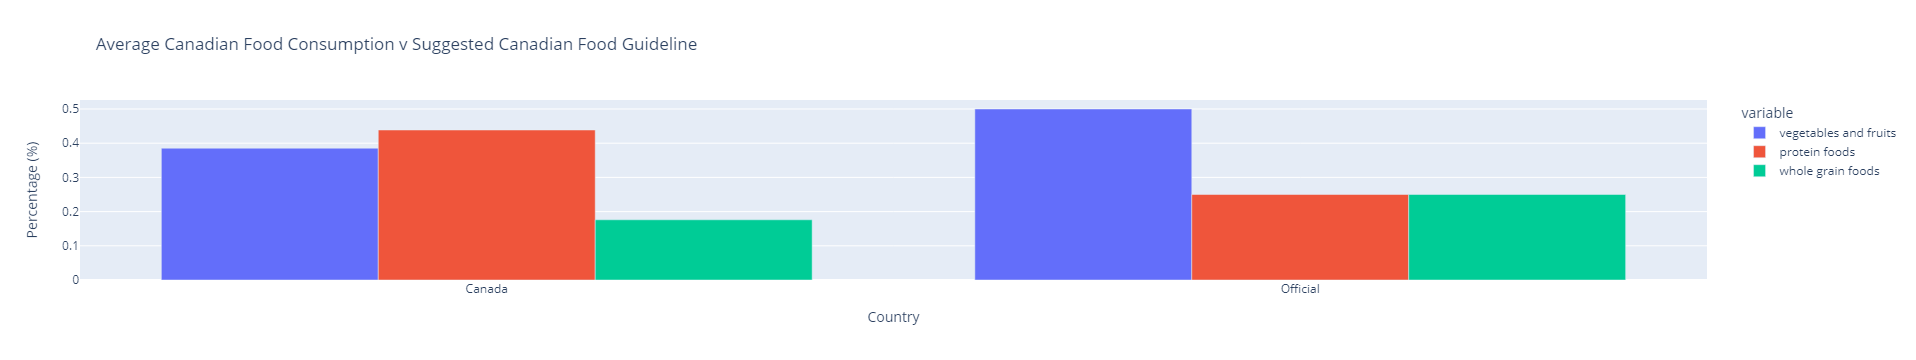

In [101]:
# display the bar graphs side by side for comparison

fig = px.bar(canada, x="Country", y=["vegetables and fruits", "protein foods", "whole grain foods"], barmode='group', title="Average Canadian Food Consumption v Suggested Canadian Food Guideline", labels={'value':'Percentage (%)'})
fig.show()

# FINAL CONCLUSIONS, LIMITATIONS & FUTURE DIRECTIONS

Using our guidings questions to help "guide" us, these are the findings we found from each of the questions we asked:

Question 1:
<br>
1. Obesity has a positive relationship with COVID-19 outcomes: confirmed cases and the number of deaths related to COVID.
2. Contrary to our predictions, undernourishment had a negative relationship with COVID-19 outcomes: confirmed cases and the number of deaths related to COVID-19. This negative relationship was also quite weak. Further analysis needs to be determined to explain undernourishment's relationship with COVID-19 outcomes.
<br>

Question 2:
1. The cereals food group is a top food group among all countries whether they had high or low rates of obesity and undernourishment.
2. High obesity countries consumed almost twice as much meat as the low obesity countries.
3. Between countries with high rates of obesity and low rates of obesity, both had 'Cereals' and 'Vegetables' as their top foods.
    - The food groups, 'Milk' and 'Starchy Roots' is the only difference between the high and low obesity groups respectively.
5. The top 3 sub food groups consumed for "animal products", "Milk", "Meat", and "Fish" are the same for all countries (there were no differences based on their groups of high/low rates obesity or high/low rates of undenrourishment.
6. The sub food groups consumed that made up the top 3 "vegetal products" and "animal products" consumed for countries with high and low rates of obesity Countries were the same.
7. Out of the 3 top sub food groups consumed for low rate of undernourishment and high rate of undernourishment, only one sub food group was different.
    - The food groups, 'Starchy Roots' and 'Vegetables' is the only difference between the high and low undernourishment groups respectively.
8. The consumption of vegetal and animal products were inversely related. When more vegetal products are consumed, less animal products are consumed and vice versa.
<br>

Question 3:
1. Canada has a rate of obesity (31.3%) that is higher than the world average (calculated using our dataset).
2. The average Canadian food consumption compared to the suggested Canadian food guidelines, shows that Canadians eat more protein and not enough vegetables and fruits suggested. 

Overall, our findings suggest that poor diet (as indicated by obesity rates but not undernourishment) has an effect on the rate of COVID-19 confirmed cases and the rate of deaths as a result of COVID-19. Although we found this relationship, we are unsure of how obesity interacts with COVID-19 outcomes and this is a limitation of our project. To address such a limitiation, future analyses could tell us more by looking only at a population of people who have obesity and whether they experienced any of the COVID-19 outcomes we looked at today. We also found that by classifying countries into two groups by their obesity and undernourishment allowed us to take a better look at how food groups interact with obesity and undernourishment rates. By comparing the top food groups consumed, it gave us more information on what future analyses could focus on if they wish to decide to study specific food groups and their interaction with obesity and or undernourishment rate. Lastly, we used obesity and undernourishment as an indicator of poor diet, but it may not be the best variable to measure poor diet. There may be other variables that could better measure this, such as certain rates of certain food group consumptions. Obesity is also calculated using the Body Mass Index (BMI), but BMI may not capture obesity correctly (for example, athletes could have high body mass from muscles). BMI also calculates differently among children and adults, so certain distinctions need to be made. Although our project's findings may not have found many significant results that allowed us to make any suggestions about one's diet to improve their body's immune system to defend against COVID-19, they still provided us lots of information on how to move forward with future analyses on the same topic.

# References

***

Cooper E.L. and Ma M.J. (2017) ‘Understanding nutrition and immunity in disease management’, Journal of traditional and complementary medicine, 7(4): 386-391, doi:10.1016/j.jtcme.2016.12.002

Correlation Coefficient: Simple Definition, Formula, Easy Steps (2022), Available at: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/, accessed 18 September 2022.

Country Mapping - ISO, Continent, Region, (2019) Kaggle, Available at: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region, accessed 17 October 2022.

COVID-19 pandemic, (2022) Wikipedia, Available at: https://en.wikipedia.org/wiki/COVID-19_pandemic, accessed 18 September 2022.


Health Canada, (2019) Canada’s Dietary Guidelines for for Health Professionals and Policy Makers, Government of Canada website, Available at: https://publications.gc.ca/site/eng/9.852216/publication.html, accessed 18 September 2022.

Luke Duncalfe, (2019) ISO-3166-Countries-With-Regional-Codes, GitHub website, Available at: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv, accessed October 17, 2022.

—— (n.d.) COVID-19: Prevention and risks, Government of Canada website, Available at: https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/prevention-risks.html, accessed 18 September 2022. 

—— (n.d.) Food Guide Snapshot, Government of Canada website, Available at: https://food-guide.canada.ca/en/, accessed 18 September 2022.
Obesity Canada (n.d.) Obesity in Canada, Available at: https://obesitycanada.ca/obesity-in-canada/#:~:text=Obesity%20is%20a%20progressive%20chronic,Body%20Mass%20Index%20(BMI), accessed 18 September 2022.

Ren, M. (2020) Kaggle, COVID-19 Healthy Diet Dataset, Available at: COVID-19 Healthy Diet Dataset | Kaggle accessed 18 September 2022.

Stephanie Glen. (n.d.) Correlation Coefficient: Simple Definition, Formula, Easy Steps, StatisticsHowTo website, Available at: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/, accessed September 20, 2022.

Worldometers (2022) Coronavirus Cases Available at: COVID Live - Coronavirus Statistics - Worldometer (worldometers.info), accessed 18 September 2022.